In [1]:
%load_ext autoreload
%autoreload 2

# Data Download

Do not run this ! This is used the query the data and if you already have it it might overwrite it ! 

from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

# Equally weighted

In [24]:
from equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)

Preprocessing 336
475
Preprocessing dropped the following stocksBF.B-BRK.B-OGN


<AxesSubplot: title={'center': 'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

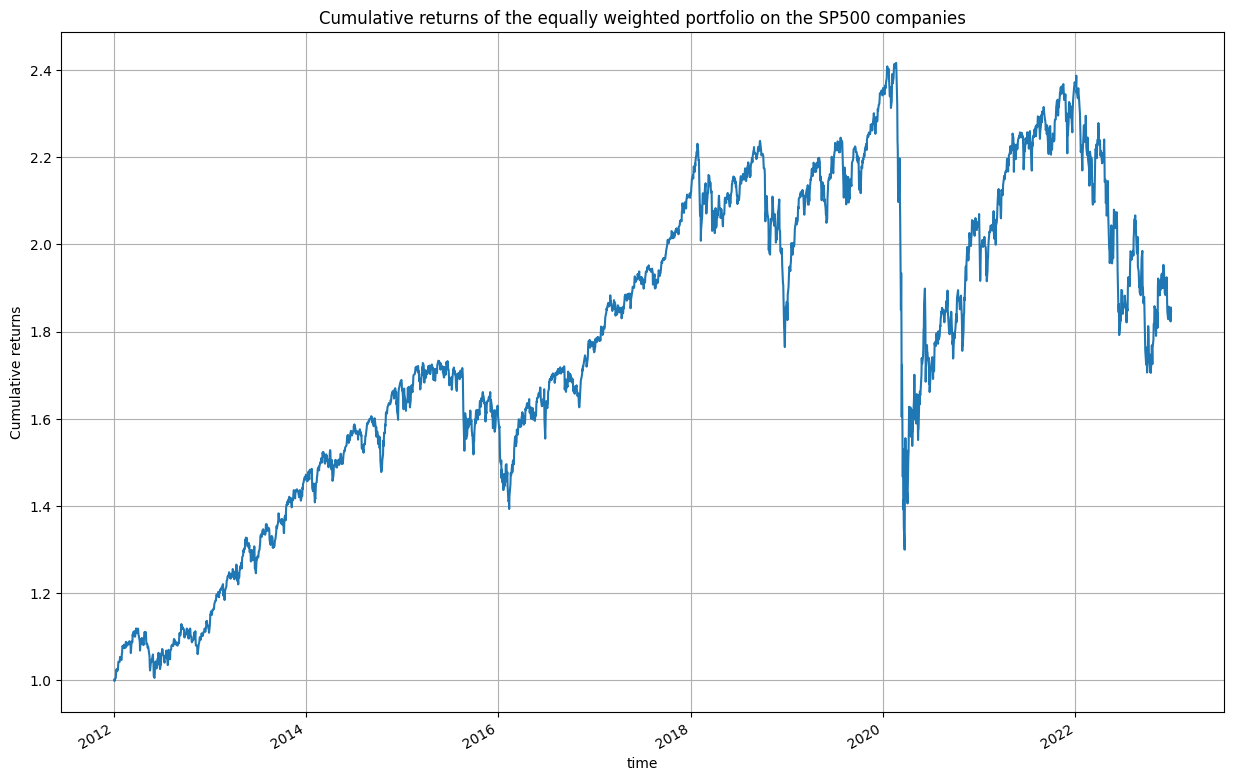

In [25]:
equal = portfolio()
equal.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [26]:
from market_weights import MarketWeighted
from config import load_config

configuration = load_config()
portfolio = MarketWeighted(configuration)


Loading library list...
Done
      permco ticker
0     8045.0   ORCL
1     8048.0   MSFT
2     8087.0   TROW
3    22168.0    HON
4    20207.0    ADM
..       ...    ...
388  52978.0     PM
389  52983.0      V
390  52985.0    AWK
391  52996.0    FRC
392   7267.0    UNH

[393 rows x 2 columns]


C:\Users\user\Desktop\stock_clustering\market_weights.py:48: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  filter(lambda x: len(x[1]) > 120, # some are missing certain dates
100%|███████████████████████████████████████████████████████████████████████████████| 189/189 [00:01<00:00, 143.07it/s]


<AxesSubplot: title={'center': 'Cumulative returns of the market weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

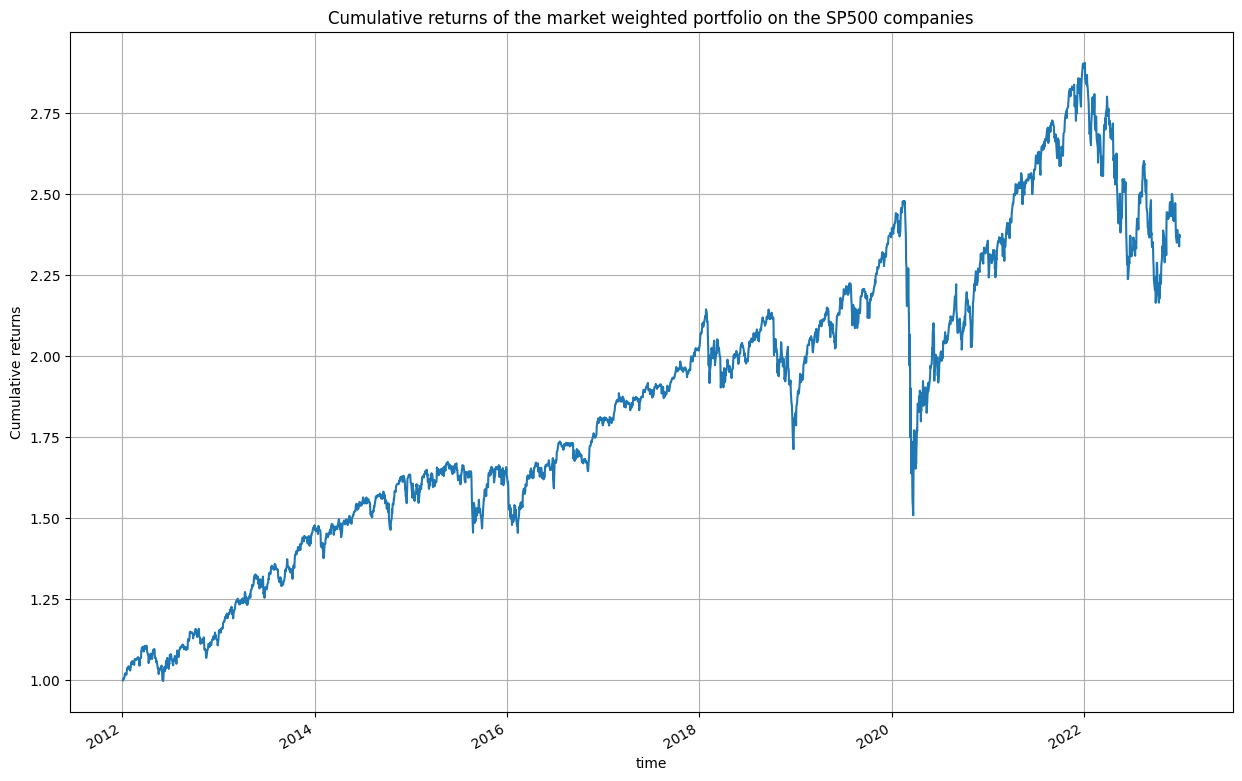

In [27]:
market = portfolio()
market.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the market weighted portfolio on the SP500 companies", figsize=(15, 10))

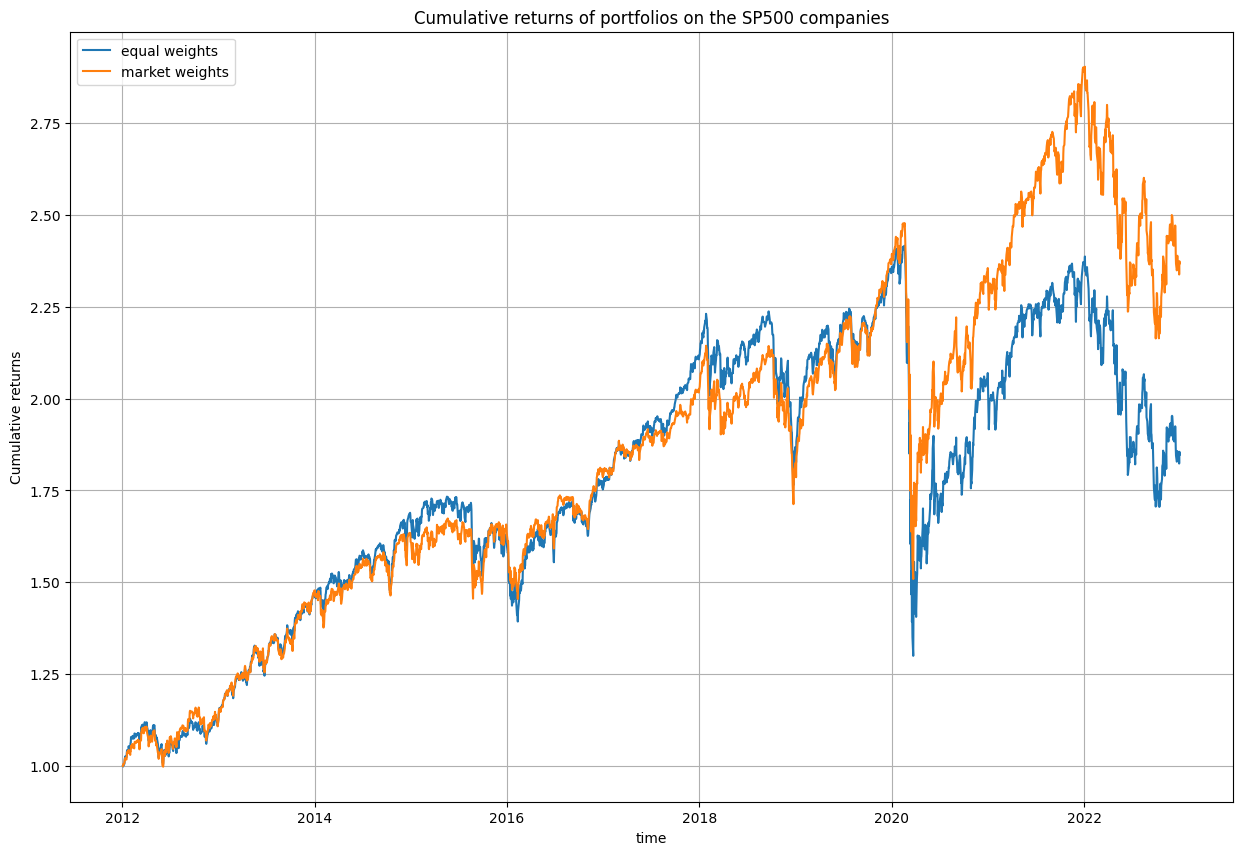

In [28]:
import matplotlib.pyplot as plt 


plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(equal, label="equal weights")
plt.plot(market, label="market weights")
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()



# Markowitz Portfolio

Multiple Risky assets and no risk free asset:

$$ \max _w\left(w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w -  \frac{C}{2}w^{\prime}w\right) \quad \text { s.t. } \quad w^{\prime} \mathbf{1}=1 $$ 

We compute our Langrangian:

$$ L(\lambda)=w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w - \frac{C}{2}w^{\prime}w +\lambda\left(1-\mathbf{1}^{\prime} w\right)  $$

Our first order condition becomes: 

$$
\frac{\partial L}{\partial w}=\mu-a \Sigma w-\lambda \mathbf{1} - Cw=0
$$
The optimal portfolio as a function of $\lambda$ is therefore:
$$
w=(a\Sigma + CI)^{-1}(\mu-\lambda \mathbf{1})
$$

Let us define the following matrix $\beta = (a\Sigma + CI)^{-1}$, Thus $\lambda$ can simply be found using the constraint $w^{\prime} \mathbf{1}=1$:

$$
\mathbf{1}^{\prime} \beta(\mu-\lambda \mathbf{1})=1
$$
solving,
$$
\lambda=\frac{\mathbf{1}^{\prime}\beta \mu- 1}{\mathbf{1}^{\prime} \beta \mathbf{1}}
$$

Plugging everything in we get: 

$$
w=\beta(\mu- \frac{\mathbf{1}^{\prime}\beta \mu-1}{\mathbf{1}^{\prime} \beta \mathbf{1}}\mathbf{1})
$$


Preprocessing 336
481
474
(2768, 463)
Preprocessing dropped the following stocksDOW-FOXA-OGN-CARR-CDAY-OTIS-CTVA-BRK.B-MRNA-FOX-BF.B


In [84]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, window_size=208, risk_aversion=8, stride=10, C=0.08, type_dist = "dtw")
cum_7 = portfolio.get_clustered_cumulative_return(parallel=True)
cum_7

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [14:05<00:00,  3.30s/it]


256 256 256 256
256
[[0.99621382]
 [0.9992506 ]
 [1.00579316]
 [1.0172281 ]
 [0.98744693]
 [1.01037423]
 [1.00467516]
 [0.98313941]
 [0.99702092]
 [0.99692624]]
(10, 1)
(2560, 1)


,0
Date,
2012-10-31,1.000557
2012-11-01,1.008534
2012-11-02,1.003223
2012-11-05,1.005252
2012-11-06,1.008905
...,...
2022-12-23,1.696094
2022-12-27,1.704024
2022-12-28,1.675293


(<AxesSubplot: title={'center': 'Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>,
 (array([[0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.38090057],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.01859276],
         [0.11699683],
         [0.01859276],
         [0.01859276],
         [0.01869086]]),
  array([[0.01963834],
         [0.01963834],
         [0.01963834],
         [0.01963834],
         [0.01963834],
         [0.01963834],
         [0.01963834],
         [

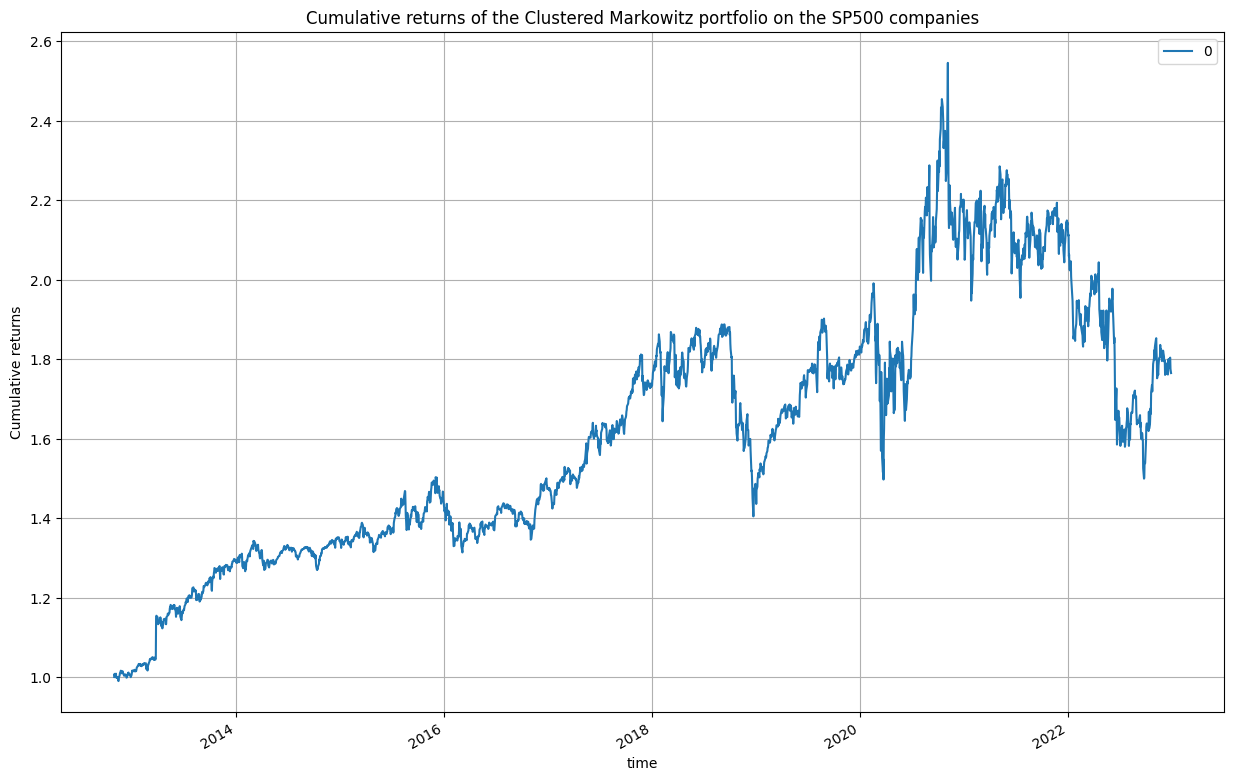

In [96]:
cum_7.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies", figsize=(15, 10)), portfolio.weights

In [102]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, window_size=208, risk_aversion=8, stride=10, C=0.08, type_dist = "corr")
cum_6 = portfolio.get_clustered_cumulative_return(parallel=True)
cum_6

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [08:38<00:00,  2.02s/it]


256 256 256 256
256
[[0.99354752]
 [0.99919011]
 [1.00302873]
 [1.01345216]
 [0.99250893]
 [1.0077284 ]
 [1.00466986]
 [0.98727931]
 [1.00129604]
 [0.99510166]]
(10, 1)
(2560, 1)


,0
Date,
2012-10-31,1.003499
2012-11-01,1.011768
2012-11-02,1.003980
2012-11-05,1.005812
2012-11-06,1.011395
...,...
2022-12-23,1.634155
2022-12-27,1.641786
2022-12-28,1.620902


(<AxesSubplot: title={'center': 'Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>,
 (array([[0.00895383],
         [0.00895383],
         [0.00895383],
         [0.19270337],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.06711246],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.11405285],
         [0.12869596],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.00895383],
         [0.11123326],
         [0.00895383],
         [0.14434138],
         [0.00906116]]),
  array([[0.07857737],
         [0.01250873],
         [0.01250873],
         [

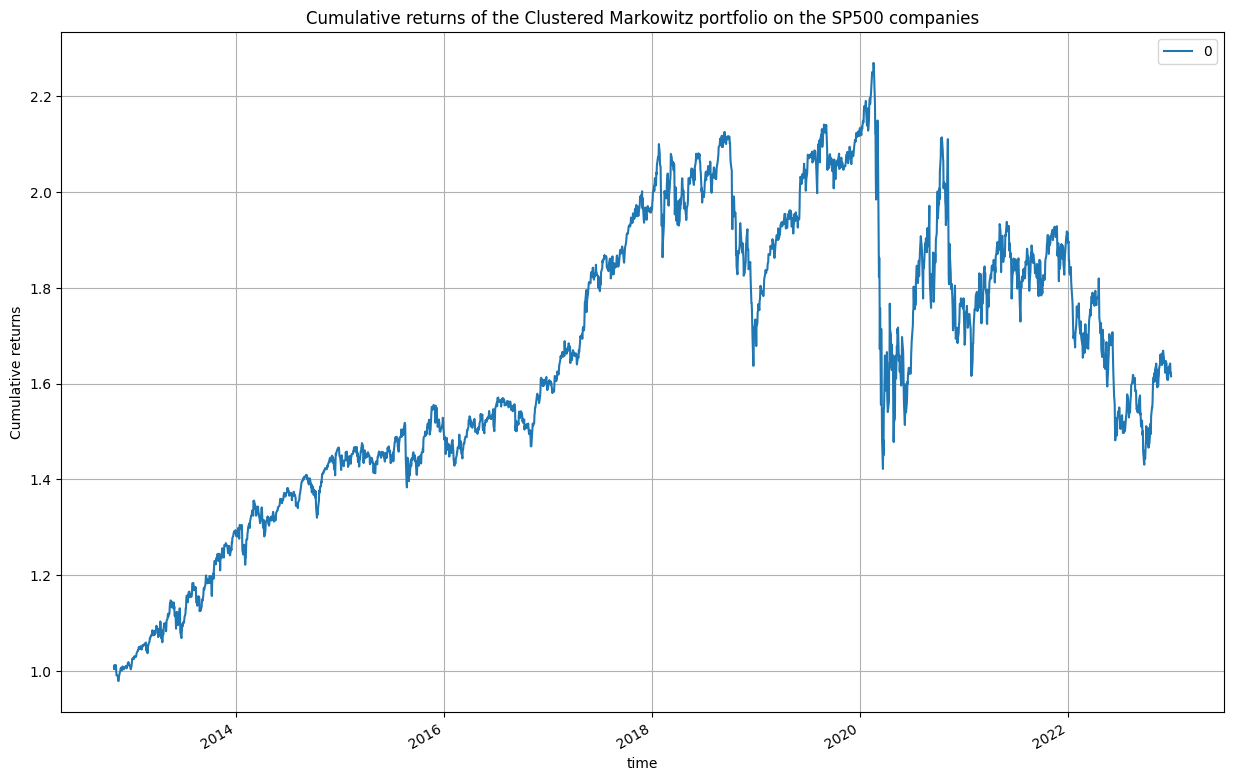

In [103]:
cum_6.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies", figsize=(15, 10)), portfolio.weights

In [ ]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, window_size=208, risk_aversion=8, stride=10, C=0.08, type_dist = "dtw")
cum_2 = portfolio.get_rolling_cumulative_return(parallel=True)

Preprocessing 336
481
474
(2768, 463)
Preprocessing dropped the following stocksDOW-FOXA-OGN-CARR-CDAY-OTIS-CTVA-BRK.B-MRNA-FOX-BF.B


 10%|████████▏                                                                        | 26/256 [02:15<14:21,  3.74s/it]

In [ ]:
cum_2.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies", figsize=(15, 10)), portfolio.weights

(<AxesSubplot: title={'center': 'Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>,
 (array([[0.00034095],
         [0.17064356],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.3279114 ],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.10797848],
         [0.06282012],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.00034095],
         [0.32143675],
         [0.00034493]]),
  array([[ 3.42292095e-03],
         [ 1.12757311e-01],
         [ 3.42292095e-03],
         [ 3.42292

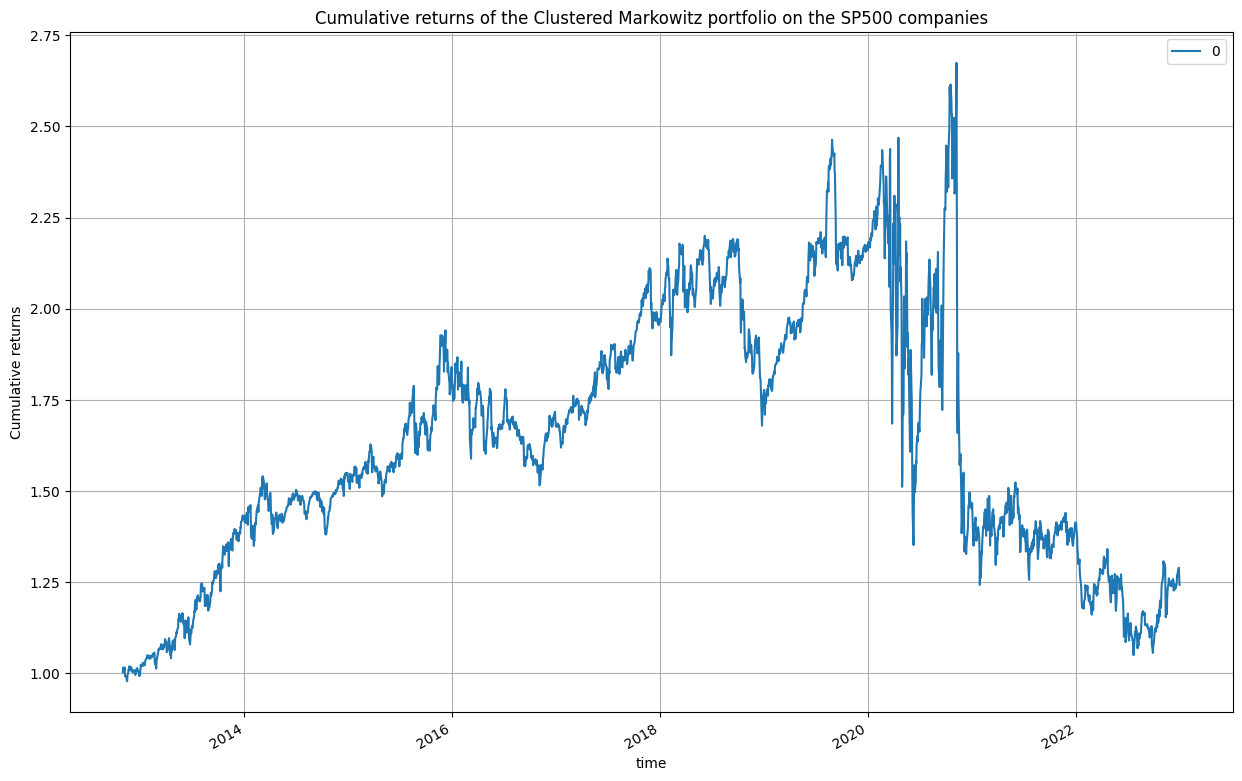

In [7]:
import numpy as np
cum_5.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the Clustered Markowitz portfolio on the SP500 companies", figsize=(15, 10)), portfolio.weights

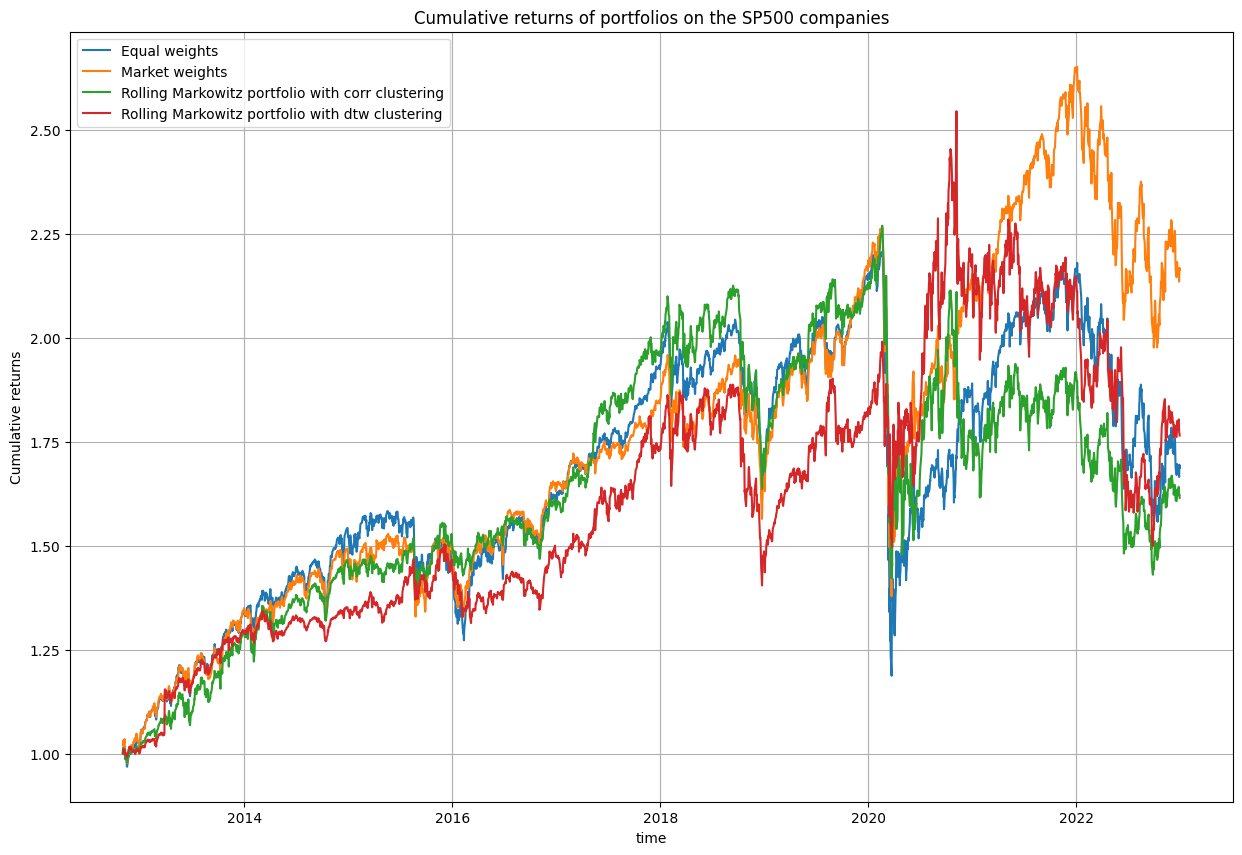

In [104]:
import matplotlib.pyplot as plt 


plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(equal.iloc[208:] / equal.iloc[208], label="Equal weights")
plt.plot(market.iloc[208:] / equal.iloc[208], label="Market weights")
plt.plot(cum_6, label="Rolling Markowitz portfolio with corr clustering")
plt.plot(cum_7, label="Rolling Markowitz portfolio with dtw clustering")
#plt.plot(a_, label="markowitz portfolio")
#aversions["equal weights"] = equal
#aversions["market weights"] = market
#aversions[["risk aversion 2.0", "market weights", "equal weights"]].plot()
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()


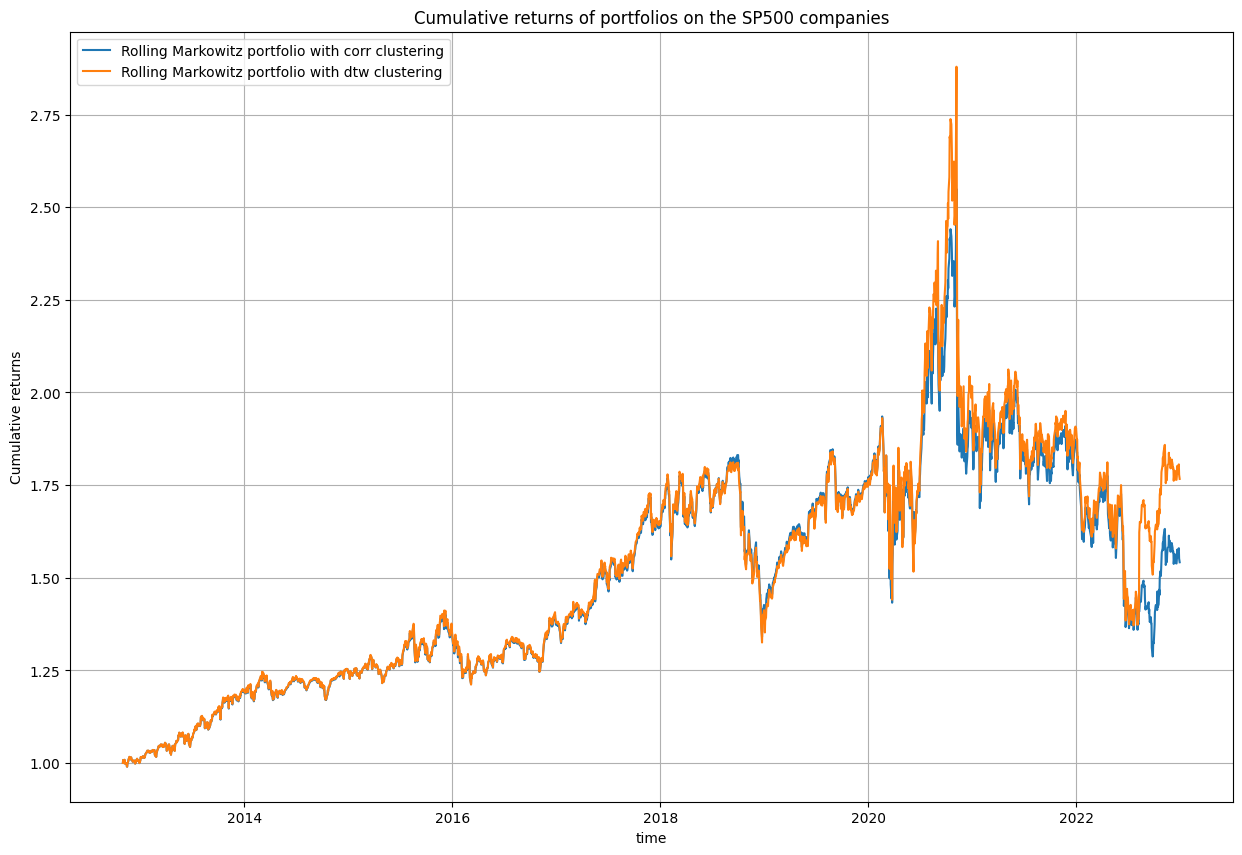

In [69]:
import matplotlib.pyplot as plt 


plt.rcParams["figure.figsize"] = (15, 10)

plt.plot(cum_6, label="Rolling Markowitz portfolio with corr clustering")
plt.plot(cum_7, label="Rolling Markowitz portfolio with dtw clustering")
#plt.plot(a_, label="markowitz portfolio")
#aversions["equal weights"] = equal
#aversions["market weights"] = market
#aversions[["risk aversion 2.0", "market weights", "equal weights"]].plot()
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()


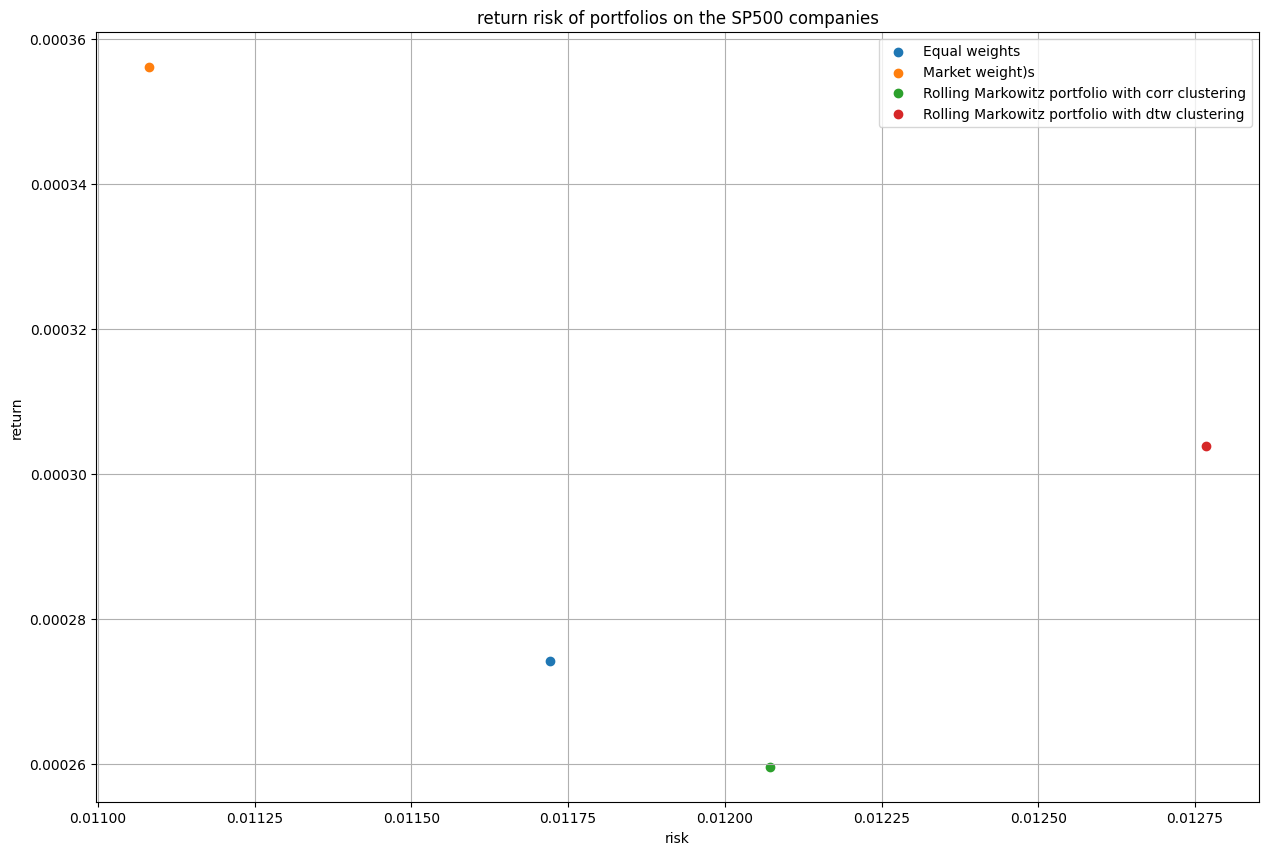

In [105]:
import matplotlib.pyplot as plt 



def cum2ret(res):
    return res.iloc[1:].to_numpy() / res.iloc[:-1].to_numpy() - 1    


plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(cum2ret(equal.iloc[208:] / equal.iloc[208]).std(), cum2ret(equal.iloc[208:] / equal.iloc[208]).mean(), label="Equal weights")
plt.scatter(cum2ret(market.iloc[208:] / market.iloc[208]).std(), cum2ret(market.iloc[208:] / market.iloc[208]).mean(), label="Market weight)s")
plt.scatter(cum2ret(cum_6).std(), cum2ret(cum_6).mean(), label="Rolling Markowitz portfolio with corr clustering")
plt.scatter(cum2ret(cum_7).std(), cum2ret(cum_7).mean(), label="Rolling Markowitz portfolio with dtw clustering")
#plt.scatter(cum2ret(cum_3).std(), cum2ret(cum_3).mean(), label="Rolling Markowitz portfolio with dtw clustering")
#plt.scatter(portfolio.returns.var(axis=0), portfolio.returns.mean(axis=0), label="The rest of the stocks")
#plt.plot(a_, label="markowitz portfolio")
#aversions["equal weights"] = equal
#aversions["market weights"] = market
#aversions[["risk aversion 2.0", "market weights", "equal weights"]].plot()
plt.xlabel("risk")
plt.ylabel("return")
plt.title("return risk of portfolios on the SP500 companies")
plt.grid()
plt.legend()


# Random plot generation

<AxesSubplot: ylabel='Frequency'>

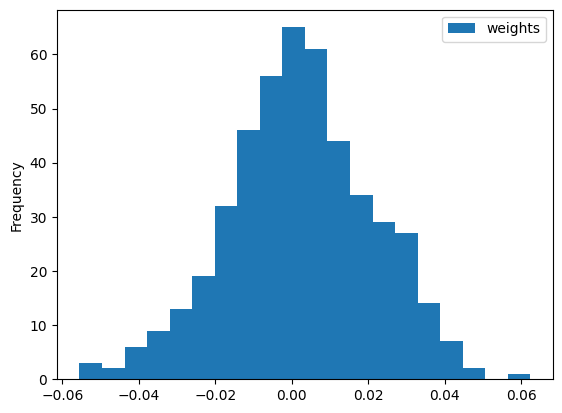

In [47]:
pd.DataFrame(op.reshape(-1, 1), columns=["weights"]).plot(kind="hist", bins=20)

<AxesSubplot: xlabel='Date'>

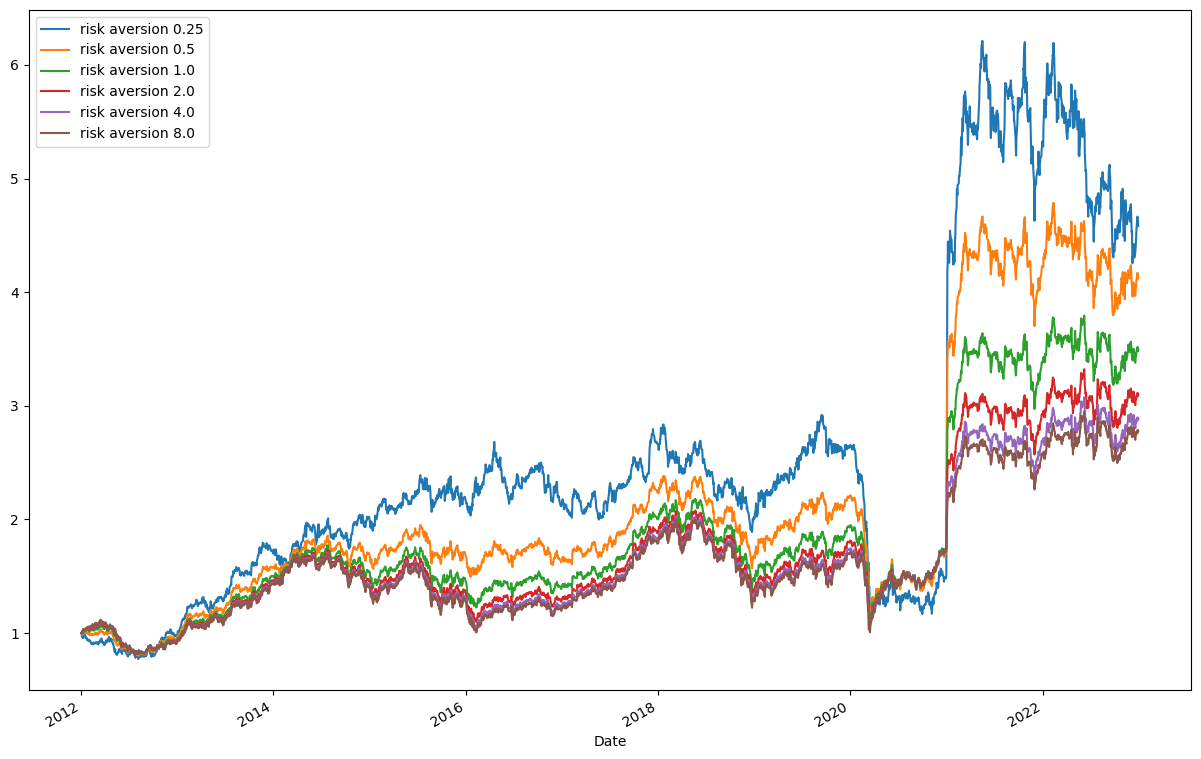

In [54]:
aversions = pd.concat(l, axis=1)
aversions.plot()

In [9]:
import networkx as nx
import numpy as np
import pandas as pd
from networkx.algorithms import community

def LouvainCorrelationClustering(C_s, resolution): 

    mygraph = nx.from_numpy_array(np.abs(C_s))
    partitions = community.louvain_communities(mygraph, resolution=resolution)

    
    return partitions


In [6]:
from utils import compute_clean_correlation_matrix
import numpy as np
import seaborn as sns
from tqdm import tqdm
from itertools import repeat
from sklearn.metrics import adjusted_rand_score

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()
print(np.corrcoef(returns.T))
corr = np.nan_to_num(np.corrcoef(returns.T))
clean_corr = compute_clean_correlation_matrix(corr, 470, 2768)

risk_aversion=2
l = []
def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)

resol = []
#
#for res in tqdm([0.95, 1, 1.1, 1.25, 1.5], position=0, leave=False):
s = []
for i in tqdm(range(207, len(returns)-10, 10), position=0, leave=False): 

    r = returns[i-207:i]
    is_var = r.std(axis=0) > 0.0
    corr = np.corrcoef(r.T)[is_var, :][:, is_var]
    #corr[np.isnan(corr)] = 0.0
    np.fill_diagonal(corr, 1)

    clean_corr = np.zeros((returns.shape[1], returns.shape[1]))
    a = compute_clean_correlation_matrix(corr, corr.shape[1], r.shape[0])
    j = 0
    if  (1 - is_var).sum():
        for i in range(len(clean_corr)):
            if is_var[i]:
                clean_corr[i, is_var] = a[j, :]
                j = j + 1
        np.fill_diagonal(clean_corr, 1)
    else:
        clean_corr = a
    clustering = LouvainCorrelationClustering(clean_corr, resolution=1)

    s.append(clustering)

    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

clusterings = []    
for clustering in tqdm(s):
    c_ = [list(zip(set_of_elem, repeat(_, len(set_of_elem)))) for _, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)



p = np.mean([adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])])
resol.append(p)

    #op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
    #a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
    #l.append(a)

    #a.plot()
    
    

[[1.         0.31583765 0.30179995 ... 0.4775061  0.42918408 0.51653781]
 [0.31583765 1.         0.28096201 ... 0.28895471 0.44728862 0.24562449]
 [0.30179995 0.28096201 1.         ... 0.29043806 0.3524787  0.30485818]
 ...
 [0.4775061  0.28895471 0.29043806 ... 1.         0.38273594 0.40665399]
 [0.42918408 0.44728862 0.3524787  ... 0.38273594 1.         0.28892566]
 [0.51653781 0.24562449 0.30485818 ... 0.40665399 0.28892566 1.        ]]


100%|██████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 7111.53it/s]


In [48]:
list(map(len, s))

[32,
 34,
 33,
 35,
 33,
 32,
 30,
 29,
 30,
 32,
 30,
 30,
 28,
 29,
 27,
 26,
 27,
 26,
 27,
 26,
 26,
 24,
 27,
 26,
 27,
 28,
 28,
 27,
 27,
 25,
 24,
 24,
 26,
 25,
 25,
 25,
 23,
 21,
 23,
 22,
 23,
 21,
 24,
 20,
 22,
 18,
 20,
 20,
 16,
 17,
 17,
 17,
 17,
 15,
 17,
 15,
 15,
 16,
 16,
 17,
 16,
 14,
 13,
 13,
 14,
 13,
 14,
 12,
 13,
 10,
 10,
 10,
 11,
 12,
 12,
 10,
 11,
 10,
 8,
 9,
 9,
 11,
 10,
 9,
 9,
 11,
 9,
 10,
 9,
 10,
 11,
 10,
 11,
 9,
 9,
 10,
 9,
 9,
 9,
 11,
 9,
 10,
 6,
 8,
 6,
 8,
 6,
 8,
 6,
 8,
 7,
 6,
 7,
 5,
 6,
 4,
 3,
 3,
 3,
 4,
 5,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 5,
 4,
 4,
 3,
 4,
 4,
 5,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 5,
 4,
 4,
 3,
 3,
 4,
 3,
 5,
 5,
 4,
 4,
 3,
 4,
 4,
 5,
 3,
 5,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,

In [39]:
resol

[0.22000593656357906,
 0.23399951358396948,
 0.2227151889743164,
 0.17720147759948082,
 0.1363102465555856]

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1012.58it/s]


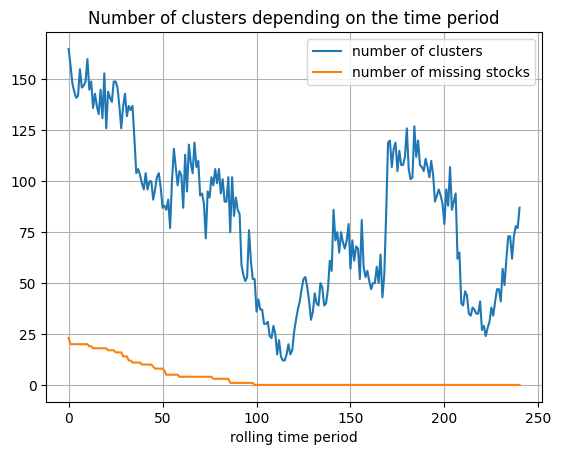

In [16]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
number_of_missing_stocks = []
for i in tqdm(range(367, len(returns), 10)): 
    r = returns[i-367:i]
    is_var = r.std(axis=0) > 0.0 
    number_of_missing_stocks.append((1-is_var).sum())
plt.plot(bro, label="number of clusters")
plt.plot(number_of_missing_stocks, label="number of missing stocks")
plt.xlabel("rolling time period")
#plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.legend()
plt.grid()

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1004.04it/s]


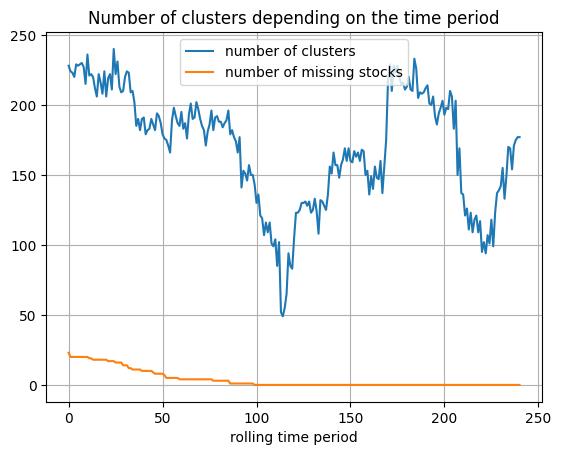

In [13]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
number_of_missing_stocks = []
for i in tqdm(range(367, len(returns), 10)): 
    r = returns[i-367:i]
    is_var = r.std(axis=0) > 0.0 
    number_of_missing_stocks.append((1-is_var).sum())
plt.plot(bro, label="number of clusters")
plt.plot(number_of_missing_stocks, label="number of missing stocks")
plt.xlabel("rolling time period")
#plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.legend()
plt.grid()


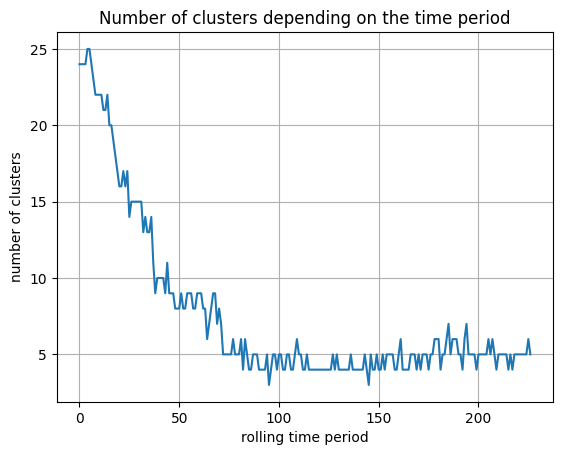

In [34]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
plt.plot(bro)
plt.xlabel("rolling time period")
plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.grid()


In [45]:
raw_corr

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.315838,0.301800,0.473025,0.377988,0.355773,0.572527,0.591114,0.545132,0.561943,...,0.360416,0.294357,0.368391,0.416116,0.546470,0.412449,0.466362,0.477506,0.429184,0.516538
AAL,0.315838,1.000000,0.280962,0.278760,0.183494,0.241095,0.240254,0.325953,0.253576,0.361275,...,0.418142,0.111724,0.332560,0.316203,0.390250,0.324927,0.373236,0.288955,0.447289,0.245624
AAP,0.301800,0.280962,1.000000,0.270812,0.261516,0.285977,0.301845,0.357023,0.284791,0.328964,...,0.267787,0.284384,0.293480,0.301757,0.380888,0.338043,0.308479,0.290438,0.352479,0.304858
AAPL,0.473025,0.278760,0.270812,1.000000,0.274750,0.286929,0.437295,0.513590,0.537360,0.541959,...,0.343961,0.283735,0.316849,0.311147,0.417349,0.360114,0.372625,0.443271,0.323107,0.440490
ABBV,0.377988,0.183494,0.261516,0.274750,1.000000,0.385237,0.444365,0.366265,0.317906,0.327527,...,0.238229,0.259607,0.306612,0.329207,0.316338,0.267065,0.366414,0.272323,0.277427,0.415290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.412449,0.324927,0.338043,0.360114,0.267065,0.288937,0.381604,0.471999,0.389206,0.412971,...,0.351327,0.330522,0.359951,0.349310,0.440355,1.000000,0.416501,0.336970,0.373123,0.395438
ZBH,0.466362,0.373236,0.308479,0.372625,0.366414,0.351922,0.472219,0.501266,0.373748,0.440096,...,0.410802,0.277761,0.431313,0.499469,0.450446,0.416501,1.000000,0.353175,0.442394,0.411619
ZBRA,0.477506,0.288955,0.290438,0.443271,0.272323,0.272415,0.399558,0.481622,0.442631,0.496859,...,0.357866,0.183153,0.325007,0.276421,0.437716,0.336970,0.353175,1.000000,0.382736,0.406654
ZION,0.429184,0.447289,0.352479,0.323107,0.277427,0.339166,0.344549,0.464672,0.276203,0.448269,...,0.430331,0.166130,0.521273,0.441984,0.513841,0.373123,0.442394,0.382736,1.000000,0.288926


In [46]:
from tqdm import tqdm
clustering = LouvainCorrelationClustering(raw_corr.to_numpy())

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

def do_it(subset):
    
    print(raw_corr.to_numpy().shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], raw_corr.to_numpy()[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            
    

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 267.04it/s]

(470, 470)
(5, 1) (5, 5)
[[1.32751794]]
[[-0.99937106]]
-0.7528117187707172
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(137, 1) (137, 137)
[[3.97481527]]
[[-1.0002646]]
-0.2516505875147185
weights shape is  (137, 1) and retruns shape is (2768, 470)
(470, 470)
(2, 1) (2, 2)
[[1.30883985]]
[[-1.00015168]]
-0.7641513051344485
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(34, 1) (34, 34)
[[2.29326724]]
[[-0.99951856]]
-0.4358491431165218
weights shape is  (34, 1) and retruns shape is (2768, 470)
(470, 470)
(26, 1) (26, 26)
[[2.70510238]]
[[-0.99934522]]
-0.3694297223641189
weights shape is  (26, 1) and retruns shape is (2768, 470)
(470, 470)
(112, 1) (112, 112)
[[9.40075173]]
[[-1.06641864]]
-0.11343972001173754
weights shape is  (112, 1) and retruns shape is (2768, 470)
(470, 470)
(21, 1) (21, 21)
[[2.62533405]]
[[-0.99960157]]
-0.38075214493959414
weights shape is  (21, 1) and retruns shape is (2768, 470)
(470, 470)
(121, 1) (121, 121)
[[

(2768, 12)

(12, 1) (12, 12)
[[2.46653483]]
[[-1.00509802]]
-0.4074939494810485


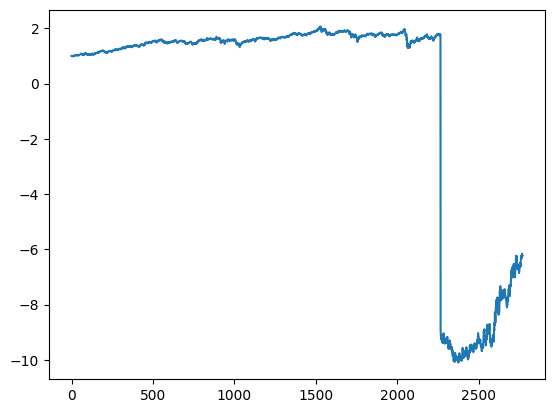

In [47]:


#raw_corr, _ = compute_clean_correlation_matrix(ts)

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)


In [72]:
from tqdm import tqdm

risk_aversion=1

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

clean_corr = np.array(clean_corr)

clustering = LouvainCorrelationClustering(clean_corr)

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()



def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    


100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 724.96it/s]

(470, 470)
(2, 1) (2, 2)
[[3.81563372]]
[[-1.00156346]]
-0.2624894152868587
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99946221]]
-0.999462209899197
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99928427]]
-0.9992842680911869
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99957468]]
-0.9995746754773028
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[-45.48904967]]
[[-1.01585932]]
0.022331953033681212
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[10.52113943]]
[[-0.9970766]]
-0.09476888034253757
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(41, 1) (41, 41)
[[29.19630898]]
[[-0.99450873]]
-0.03406282380823938
weights shape is  (41, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99974247]]
-0.999742470875227
weights sh

(2768, 131)

(11, 1) (11, 11)
[[3.18809266]]
[[-0.99868754]]
-0.31325549380357015


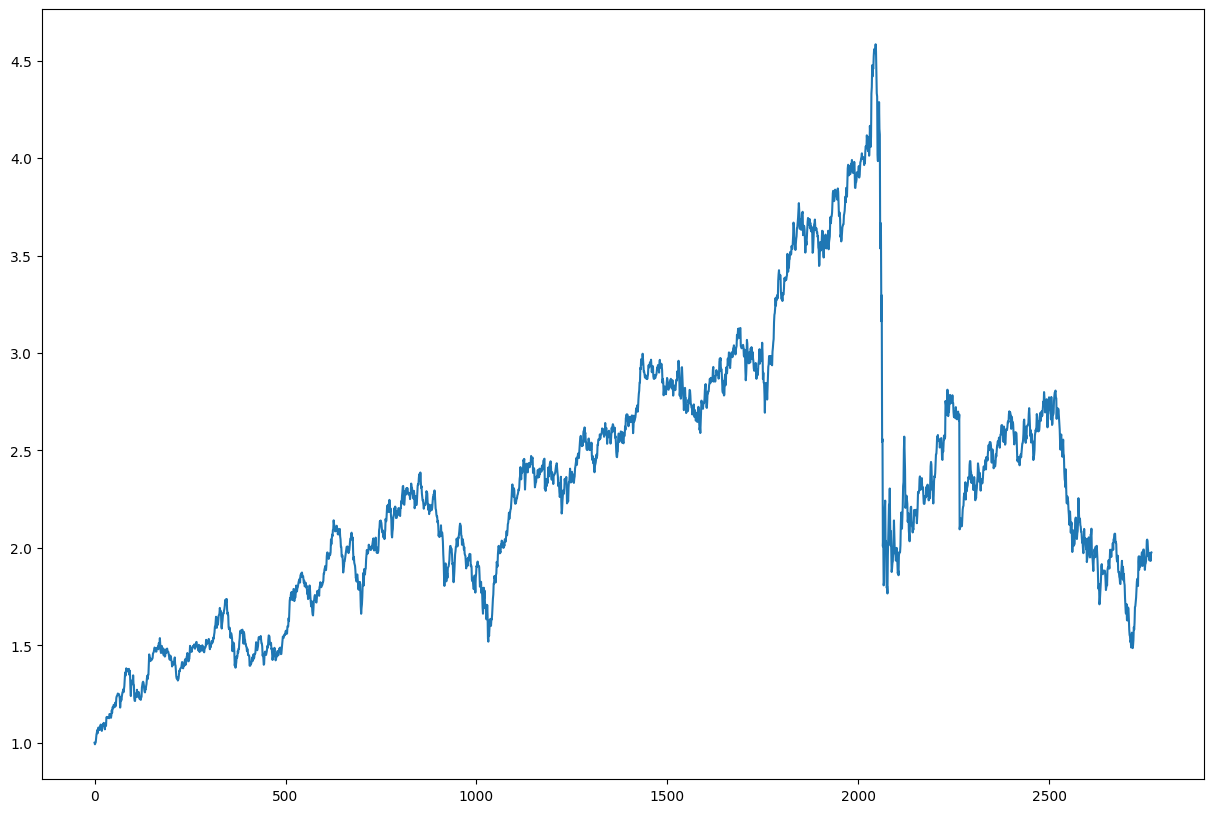

In [70]:

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)

In [35]:
a = pd.read_csv("data/us-stocks.csv")
a = a.dropna(axis=0, thresh=int(0.1*a.shape[1])).dropna(axis=1, thresh=int(0.1*a.shape[0]))
a

,Unnamed: 0,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,...,SGR,LIZ,DT,ABK,ID,CAE,TKS,BMT,AG,TBL
8340,8341,151.19,0.88,13.08,1.12,2.95,2.66,2.00,2.88,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8341,8342,150.66,0.88,13.00,1.14,2.98,2.70,1.96,2.85,2.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8342,8343,152.81,0.91,13.26,1.15,3.07,2.88,2.00,2.89,2.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8343,8344,153.37,0.90,13.28,1.16,3.07,2.88,2.02,2.87,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8344,8345,152.67,0.90,13.26,1.17,3.16,2.88,1.97,2.83,2.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16287,1868.20,25.76,186.22,81.38,124.43,96.82,12.17,29.59,66.43,...,355.0,27.68,NaN,0.41,NaN,13.59,5.91,NaN,11.14,8000.0
16287,16288,1846.34,25.34,183.90,79.93,121.89,95.61,11.86,28.91,65.71,...,355.0,27.50,NaN,0.42,NaN,13.48,6.00,NaN,11.50,8000.0
16288,16289,1841.13,25.11,182.21,80.07,123.11,95.39,11.84,29.07,65.77,...,355.0,26.88,NaN,NaN,NaN,13.38,6.04,NaN,11.53,8000.0
16289,16290,1858.83,25.43,185.81,81.39,125.42,95.67,11.90,29.48,66.38,...,370.0,27.05,NaN,0.42,NaN,13.35,6.08,NaN,11.16,8000.0


In [27]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [59]:
data =  ((portfolio.data.diff()/portfolio.data)).fillna(0)

In [64]:
for time_period in tqdm(np.split(data.to_numpy(), np.arange(100, data.shape[0], 100))):
    
    dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:27<00:00,  1.03it/s]


In [17]:
from dtaidistance import dtw

da
ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
ds

array([[       inf, 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [       inf,        inf, 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [       inf,        inf,        inf, ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [       inf,        inf,        inf, ...,        inf, 0.88736917,
        0.81170198],
       [       inf,        inf,        inf, ...,        inf,        inf,
        0.73102395],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf]])

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

array([[0.        , 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [1.13333583, 0.        , 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [0.76874758, 1.16879652, 0.        , ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [0.83835698, 1.17818988, 0.8307227 , ..., 0.        , 0.88736917,
        0.81170198],
       [0.70454819, 1.08183983, 0.84438631, ..., 0.88736917, 0.        ,
        0.73102395],
       [0.58087342, 1.1547224 , 0.74408932, ..., 0.81170198, 0.73102395,
        0.        ]])

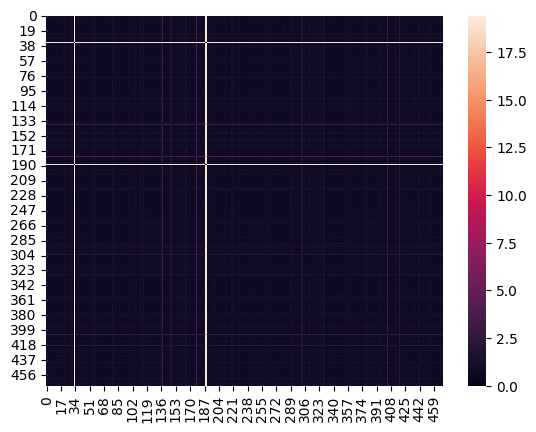

In [24]:
import numpy as np
import seaborn as sns

np.fill_diagonal(ds, 0)
ds[ds == np.inf] = 0
ds_ = np.copy(ds)
ds_ = ds_ + ds_.T
sns.heatmap(ds_)
ds_

<AxesSubplot: xlabel='Date'>

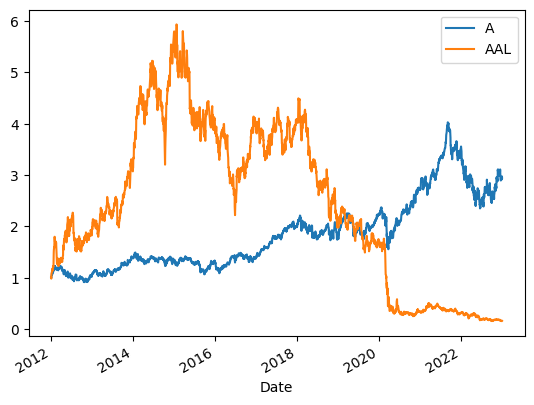

In [57]:
_returns.iloc[:, 0:2].cumprod().plot()

<AxesSubplot: ylabel='Frequency'>

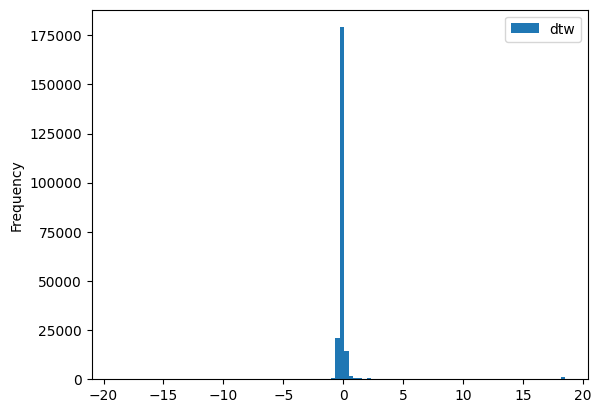

In [28]:
import pandas as pd

w = (ds_ - ds_.mean(axis=1)).reshape(-1)
pd.DataFrame(w, columns=["dtw"]).plot(kind="hist", bins=100)

In [37]:
dist_2_sim = 1/ds_
np.fill_diagonal(dist_2_sim, 0)

C:\Users\user\AppData\Local\Temp\ipykernel_10960\1508931032.py:1: RuntimeWarning: divide by zero encountered in divide
  dist_2_sim = 1/ds_


<AxesSubplot: ylabel='Frequency'>

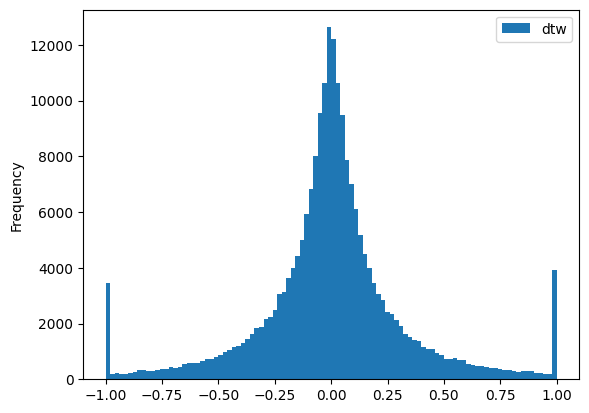

In [41]:
pd.DataFrame(clean_corr.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

<AxesSubplot: ylabel='Frequency'>

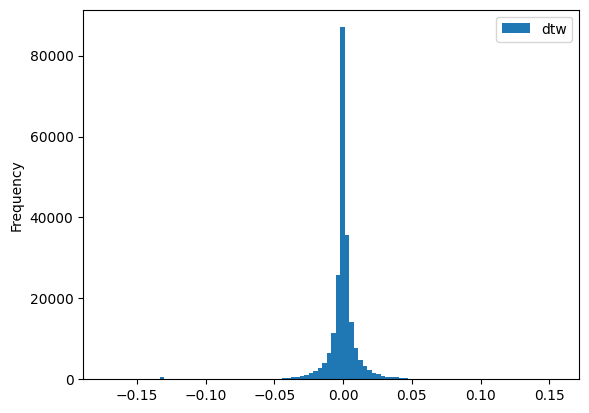

In [54]:
signed_dtw = (dist_2_sim - dist_2_sim.mean())/np.max(np.abs(dist_2_sim)) * (clean_corr)
pd.DataFrame(signed_dtw.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

0.11697467009189476


array([[ 4.59435799e-03],
       [ 2.79476874e-03],
       [ 4.12328933e-02],
       [ 7.22508239e-03],
       [-3.63122918e-03],
       [-4.79048754e-03],
       [-2.24630332e-02],
       [ 2.51992950e-03],
       [ 3.16927794e-03],
       [ 9.68257445e-03],
       [-3.67556927e-03],
       [ 9.68557518e-04],
       [-2.82094305e-03],
       [-7.86072631e-03],
       [-1.21858059e-02],
       [ 4.23790115e-04],
       [ 1.58536674e-02],
       [ 8.85088862e-03],
       [-2.87529858e-02],
       [ 6.10841780e-03],
       [-2.56206988e-02],
       [-1.68887496e-03],
       [ 1.29223235e-02],
       [-9.37880797e-03],
       [ 6.11843351e-03],
       [-1.93535586e-03],
       [-3.22568951e-03],
       [ 4.75833306e-03],
       [ 1.56831879e-02],
       [ 1.42503989e-02],
       [ 1.84622564e-03],
       [ 7.50170696e-03],
       [-8.56009410e-03],
       [ 2.29184245e-02],
       [-5.46438979e-03],
       [-1.04076324e-02],
       [-3.68935260e-03],
       [ 1.26663538e-02],
       [ 9.0

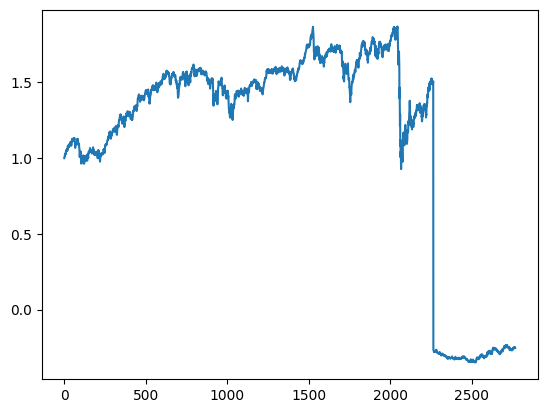

In [55]:
import matplotlib.pyplot as plt

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
print(returns.mean(axis=0).sum())
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], signed_dtw)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
a_ = np.cumprod((_returns.to_numpy()@op))

plt.plot(a_)
op

In [14]:
from utils import compute_clean_correlation_matrix
import numpy as np
from tqdm import tqdm
from dtaidistance import dtw, clustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from itertools import repeat


#clean_corr = compute_clean_correlation_matrix(returns.corr().fillna(0))
#returns = returns

ARIs = []
returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
for res in [0.9, 1, 1.1, 1.25, 1.5]:
    l = []
    for i, time_period in enumerate(tqdm(np.split(returns.to_numpy(), np.arange(208, returns.shape[0], 10)), position=0, leave=True)):

        #ds = dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
        is_var = time_period.std(axis=0) > 0.0
        ds = dtw.distance_matrix(time_period[:, is_var].T, only_triu=True, use_c=True, parallel=True)
        np.fill_diagonal(ds, 1)
        ds[ds == np.inf] = 0
        #ds_ = np.copy(ds)
        ds = ds + ds.T
        ds = 1/ds
        np.fill_diagonal(ds, 0)
        #np.corrcoef(.T)[is_var, :][:, is_var]
        #corr[np.isnan(corr)] = 0.0

        clean_corr = np.zeros((returns.shape[1], returns.shape[1]))
        a = ds
        j = 0
        if  (1 - is_var).sum():
            for i in range(len(clean_corr)):
                if is_var[i]:
                    clean_corr[i, is_var] = a[j, :]
                    j = j + 1
            np.fill_diagonal(clean_corr, 1)
        else:
            clean_corr = a
        #c = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill").corr().to_numpy(), 470, 2768)
        #c = np.array(c)
        #ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
        fa = LouvainCorrelationClustering(clean_corr, resolution=res)
        l.append(fa)
    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

    clusterings = []
    for clustering in tqdm(l):
        c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
        c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
        clusterings.append(c_)



    p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
    ARIs.append(np.mean(p))
    print(ARIs[-1])
    #ts.shape

    #op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
    #a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
    #l.append(a)

    #a.plot()


    

100%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 9519.29it/s]


0.22365357969260444


100%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 7788.27it/s]


0.11795666063646557


100%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 5706.72it/s]


0.12130694941903664


100%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 5039.39it/s]


0.11471841193926662


100%|██████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 4431.94it/s]

0.1063410868951114


In [23]:
_ARIs = []
returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
for res in [0.8, 0.85, 0.9, 0.95]:
    l = []
    for i, time_period in enumerate(tqdm(np.split(returns.to_numpy(), np.arange(48, returns.shape[0], 10)), position=0, leave=True)):

        #ds = dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
        is_var = time_period.std(axis=0) > 0.0
        ds = dtw.distance_matrix(time_period[:, is_var].T, only_triu=True, use_c=True, parallel=True)
        np.fill_diagonal(ds, 1)
        ds[ds == np.inf] = 0
        #ds_ = np.copy(ds)
        ds = ds + ds.T
        ds = 1/ds
        np.fill_diagonal(ds, 0)
        #np.corrcoef(.T)[is_var, :][:, is_var]
        #corr[np.isnan(corr)] = 0.0

        clean_corr = np.zeros((returns.shape[1], returns.shape[1]))
        a = ds
        j = 0
        if  (1 - is_var).sum():
            for i in range(len(clean_corr)):
                if is_var[i]:
                    clean_corr[i, is_var] = a[j, :]
                    j = j + 1
            np.fill_diagonal(clean_corr, 1)
        else:
            clean_corr = a
        #c = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill").corr().to_numpy(), 470, 2768)
        #c = np.array(c)
        #ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
        fa = LouvainCorrelationClustering(clean_corr, resolution=0.95)
        print(len(fa))
        l.append(fa)
    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

    clusterings = []
    for clustering in tqdm(l):
        c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
        c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
        clusterings.append(c_)



    p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
    _ARIs.append(np.mean(p))
    print(_ARIs[-1])
    
    break

  0%|▎                                                                                 | 1/273 [00:01<06:39,  1.47s/it]

34


  1%|▌                                                                                 | 2/273 [00:02<05:35,  1.24s/it]

34


  1%|▉                                                                                 | 3/273 [00:03<05:24,  1.20s/it]

33


  1%|█▏                                                                                | 4/273 [00:04<05:24,  1.21s/it]

32


  2%|█▌                                                                                | 5/273 [00:06<05:21,  1.20s/it]

32


  2%|█▊                                                                                | 6/273 [00:07<05:14,  1.18s/it]

32


  3%|██                                                                                | 7/273 [00:08<05:09,  1.16s/it]

32


  3%|██▍                                                                               | 8/273 [00:09<05:04,  1.15s/it]

31


  3%|██▋                                                                               | 9/273 [00:10<05:01,  1.14s/it]

31


  4%|██▉                                                                              | 10/273 [00:11<04:59,  1.14s/it]

31


  4%|███▎                                                                             | 11/273 [00:12<05:05,  1.17s/it]

31


  4%|███▌                                                                             | 12/273 [00:14<05:08,  1.18s/it]

31


  5%|███▊                                                                             | 13/273 [00:15<05:12,  1.20s/it]

30


  5%|████▏                                                                            | 14/273 [00:16<05:23,  1.25s/it]

31


  5%|████▍                                                                            | 15/273 [00:17<05:16,  1.23s/it]

31


  6%|████▋                                                                            | 16/273 [00:19<05:17,  1.23s/it]

31


  6%|█████                                                                            | 17/273 [00:20<05:04,  1.19s/it]

29


  7%|█████▎                                                                           | 18/273 [00:21<04:58,  1.17s/it]

29


  7%|█████▋                                                                           | 19/273 [00:22<04:52,  1.15s/it]

29


  7%|█████▉                                                                           | 20/273 [00:23<04:52,  1.16s/it]

29


  8%|██████▏                                                                          | 21/273 [00:24<04:49,  1.15s/it]

29


  8%|██████▌                                                                          | 22/273 [00:25<04:47,  1.14s/it]

28


  8%|██████▊                                                                          | 23/273 [00:27<04:43,  1.13s/it]

27


  9%|███████                                                                          | 24/273 [00:28<04:44,  1.14s/it]

26


  9%|███████▍                                                                         | 25/273 [00:29<04:47,  1.16s/it]

26


 10%|███████▋                                                                         | 26/273 [00:30<04:43,  1.15s/it]

26


 10%|████████                                                                         | 27/273 [00:31<04:52,  1.19s/it]

26


 10%|████████▎                                                                        | 28/273 [00:33<05:08,  1.26s/it]

26


 11%|████████▌                                                                        | 29/273 [00:34<05:01,  1.23s/it]

26


 11%|████████▉                                                                        | 30/273 [00:35<05:03,  1.25s/it]

26


 11%|█████████▏                                                                       | 31/273 [00:37<05:11,  1.29s/it]

25


 12%|█████████▍                                                                       | 32/273 [00:38<05:08,  1.28s/it]

25


 12%|█████████▊                                                                       | 33/273 [00:39<05:07,  1.28s/it]

23


 12%|██████████                                                                       | 34/273 [00:40<05:03,  1.27s/it]

22


 13%|██████████▍                                                                      | 35/273 [00:42<04:53,  1.23s/it]

22


 13%|██████████▋                                                                      | 36/273 [00:43<04:50,  1.22s/it]

22


 14%|██████████▉                                                                      | 37/273 [00:44<04:49,  1.23s/it]

22


 14%|███████████▎                                                                     | 38/273 [00:45<04:45,  1.22s/it]

22


 14%|███████████▌                                                                     | 39/273 [00:46<04:43,  1.21s/it]

23


 15%|███████████▊                                                                     | 40/273 [00:48<04:40,  1.21s/it]

22


 15%|████████████▏                                                                    | 41/273 [00:49<04:37,  1.20s/it]

22


 15%|████████████▍                                                                    | 42/273 [00:53<08:39,  2.25s/it]

22


 16%|████████████▊                                                                    | 43/273 [00:55<07:28,  1.95s/it]

22


 16%|█████████████                                                                    | 44/273 [00:56<06:40,  1.75s/it]

21


 16%|█████████████▎                                                                   | 45/273 [00:57<06:12,  1.63s/it]

21


 17%|█████████████▋                                                                   | 46/273 [00:59<05:41,  1.50s/it]

20


 17%|█████████████▉                                                                   | 47/273 [01:00<05:26,  1.44s/it]

21


 18%|██████████████▏                                                                  | 48/273 [01:01<05:09,  1.37s/it]

20


 18%|██████████████▌                                                                  | 49/273 [01:02<04:56,  1.32s/it]

20


 18%|██████████████▊                                                                  | 50/273 [01:03<04:46,  1.29s/it]

20


 19%|███████████████▏                                                                 | 51/273 [01:05<04:39,  1.26s/it]

20


 19%|███████████████▍                                                                 | 52/273 [01:06<05:09,  1.40s/it]

21


 19%|███████████████▋                                                                 | 53/273 [01:08<04:54,  1.34s/it]

20


 20%|████████████████                                                                 | 54/273 [01:09<04:48,  1.32s/it]

19


 20%|████████████████▎                                                                | 55/273 [01:10<04:38,  1.28s/it]

19


 21%|████████████████▌                                                                | 56/273 [01:11<04:32,  1.26s/it]

19


 21%|████████████████▉                                                                | 57/273 [01:13<04:34,  1.27s/it]

20


 21%|█████████████████▏                                                               | 58/273 [01:14<04:37,  1.29s/it]

19


 22%|█████████████████▌                                                               | 59/273 [01:15<04:31,  1.27s/it]

19


 22%|█████████████████▊                                                               | 60/273 [01:16<04:26,  1.25s/it]

18


 22%|██████████████████                                                               | 61/273 [01:18<04:21,  1.23s/it]

19


 23%|██████████████████▍                                                              | 62/273 [01:19<04:19,  1.23s/it]

17


 23%|██████████████████▋                                                              | 63/273 [01:20<04:25,  1.26s/it]

18


 23%|██████████████████▉                                                              | 64/273 [01:21<04:22,  1.25s/it]

16


 24%|███████████████████▎                                                             | 65/273 [01:23<04:26,  1.28s/it]

15


 24%|███████████████████▌                                                             | 66/273 [01:24<04:33,  1.32s/it]

14


 25%|███████████████████▉                                                             | 67/273 [01:25<04:28,  1.30s/it]

14


 25%|████████████████████▏                                                            | 68/273 [01:27<04:19,  1.27s/it]

13


 25%|████████████████████▍                                                            | 69/273 [01:28<04:15,  1.25s/it]

13


 26%|████████████████████▊                                                            | 70/273 [01:29<04:11,  1.24s/it]

14


 26%|█████████████████████                                                            | 71/273 [01:30<04:07,  1.23s/it]

13


 26%|█████████████████████▎                                                           | 72/273 [01:31<04:13,  1.26s/it]

13


 27%|█████████████████████▋                                                           | 73/273 [01:33<04:18,  1.29s/it]

13


 27%|█████████████████████▉                                                           | 74/273 [01:34<04:26,  1.34s/it]

12


 27%|██████████████████████▎                                                          | 75/273 [01:36<04:24,  1.34s/it]

13


 28%|██████████████████████▌                                                          | 76/273 [01:37<04:17,  1.31s/it]

13


 28%|██████████████████████▊                                                          | 77/273 [01:38<04:33,  1.39s/it]

12


 29%|███████████████████████▏                                                         | 78/273 [01:40<04:20,  1.33s/it]

11


 29%|███████████████████████▍                                                         | 79/273 [01:41<04:19,  1.34s/it]

12


 29%|███████████████████████▋                                                         | 80/273 [01:42<04:13,  1.32s/it]

11


 30%|████████████████████████                                                         | 81/273 [01:44<04:09,  1.30s/it]

10


 30%|████████████████████████▎                                                        | 82/273 [01:45<04:05,  1.29s/it]

12


 30%|████████████████████████▋                                                        | 83/273 [01:46<04:00,  1.27s/it]

11


 31%|████████████████████████▉                                                        | 84/273 [01:47<03:58,  1.26s/it]

10


 31%|█████████████████████████▏                                                       | 85/273 [01:49<04:08,  1.32s/it]

8


 32%|█████████████████████████▌                                                       | 86/273 [01:50<04:05,  1.31s/it]

7


 32%|█████████████████████████▊                                                       | 87/273 [01:51<04:06,  1.32s/it]

7


 32%|██████████████████████████                                                       | 88/273 [01:53<04:03,  1.32s/it]

8


 33%|██████████████████████████▍                                                      | 89/273 [01:54<04:01,  1.31s/it]

7


 33%|██████████████████████████▋                                                      | 90/273 [01:55<03:54,  1.28s/it]

8


 33%|███████████████████████████                                                      | 91/273 [01:56<03:50,  1.27s/it]

8


 34%|███████████████████████████▎                                                     | 92/273 [01:58<03:52,  1.29s/it]

6


 34%|███████████████████████████▌                                                     | 93/273 [01:59<03:48,  1.27s/it]

6


 34%|███████████████████████████▉                                                     | 94/273 [02:00<03:53,  1.30s/it]

6


 35%|████████████████████████████▏                                                    | 95/273 [02:02<03:50,  1.30s/it]

7


 35%|████████████████████████████▍                                                    | 96/273 [02:03<03:52,  1.31s/it]

6


 36%|████████████████████████████▊                                                    | 97/273 [02:04<03:55,  1.34s/it]

6


 36%|█████████████████████████████                                                    | 98/273 [02:06<03:49,  1.31s/it]

6


 36%|█████████████████████████████▎                                                   | 99/273 [02:07<03:58,  1.37s/it]

7


 37%|█████████████████████████████▎                                                  | 100/273 [02:08<03:51,  1.34s/it]

7


 37%|█████████████████████████████▌                                                  | 101/273 [02:10<03:46,  1.32s/it]

6


 37%|█████████████████████████████▉                                                  | 102/273 [02:11<03:48,  1.34s/it]

6


 38%|██████████████████████████████▏                                                 | 103/273 [02:12<03:51,  1.36s/it]

8


 38%|██████████████████████████████▍                                                 | 104/273 [02:14<03:41,  1.31s/it]

6


 38%|██████████████████████████████▊                                                 | 105/273 [02:15<03:39,  1.31s/it]

8


 39%|███████████████████████████████                                                 | 106/273 [02:16<03:37,  1.30s/it]

6


 39%|███████████████████████████████▎                                                | 107/273 [02:18<03:38,  1.32s/it]

7


 40%|███████████████████████████████▋                                                | 108/273 [02:19<03:43,  1.35s/it]

6


 40%|███████████████████████████████▉                                                | 109/273 [02:20<03:37,  1.33s/it]

8


 40%|████████████████████████████████▏                                               | 110/273 [02:22<03:32,  1.30s/it]

5


 41%|████████████████████████████████▌                                               | 111/273 [02:23<03:33,  1.32s/it]

6


 41%|████████████████████████████████▊                                               | 112/273 [02:24<03:38,  1.36s/it]

5


 41%|█████████████████████████████████                                               | 113/273 [02:26<03:39,  1.37s/it]

5


 42%|█████████████████████████████████▍                                              | 114/273 [02:27<03:40,  1.39s/it]

5


 42%|█████████████████████████████████▋                                              | 115/273 [02:29<03:37,  1.37s/it]

6


 42%|█████████████████████████████████▉                                              | 116/273 [02:30<03:31,  1.34s/it]

6


 43%|██████████████████████████████████▎                                             | 117/273 [02:31<03:28,  1.34s/it]

6


 43%|██████████████████████████████████▌                                             | 118/273 [02:32<03:24,  1.32s/it]

5


 44%|██████████████████████████████████▊                                             | 119/273 [02:34<03:24,  1.33s/it]

5


 44%|███████████████████████████████████▏                                            | 120/273 [02:35<03:27,  1.36s/it]

4


 44%|███████████████████████████████████▍                                            | 121/273 [02:37<03:26,  1.36s/it]

3


 45%|███████████████████████████████████▊                                            | 122/273 [02:38<03:23,  1.35s/it]

4


 45%|████████████████████████████████████                                            | 123/273 [02:39<03:22,  1.35s/it]

4


 45%|████████████████████████████████████▎                                           | 124/273 [02:45<06:20,  2.55s/it]

5


 46%|████████████████████████████████████▋                                           | 125/273 [02:46<05:26,  2.21s/it]

5


 46%|████████████████████████████████████▉                                           | 126/273 [02:47<04:47,  1.95s/it]

4


 47%|█████████████████████████████████████▏                                          | 127/273 [02:49<04:22,  1.80s/it]

3


 47%|█████████████████████████████████████▌                                          | 128/273 [02:51<04:18,  1.78s/it]

3


 47%|█████████████████████████████████████▊                                          | 129/273 [02:52<04:02,  1.68s/it]

3


 48%|██████████████████████████████████████                                          | 130/273 [02:53<03:41,  1.55s/it]

3


 48%|██████████████████████████████████████▍                                         | 131/273 [02:55<03:31,  1.49s/it]

3


 48%|██████████████████████████████████████▋                                         | 132/273 [02:56<03:20,  1.42s/it]

2


 49%|██████████████████████████████████████▉                                         | 133/273 [02:57<03:14,  1.39s/it]

3


 49%|███████████████████████████████████████▎                                        | 134/273 [02:59<03:15,  1.40s/it]

2


 49%|███████████████████████████████████████▌                                        | 135/273 [03:00<03:15,  1.42s/it]

2


 50%|███████████████████████████████████████▊                                        | 136/273 [03:01<03:14,  1.42s/it]

2


 50%|████████████████████████████████████████▏                                       | 137/273 [03:03<03:11,  1.41s/it]

2


 51%|████████████████████████████████████████▍                                       | 138/273 [03:04<03:03,  1.36s/it]

2


 51%|████████████████████████████████████████▋                                       | 139/273 [03:05<03:02,  1.36s/it]

2


 51%|█████████████████████████████████████████                                       | 140/273 [03:07<03:03,  1.38s/it]

3


 52%|█████████████████████████████████████████▎                                      | 141/273 [03:08<03:02,  1.38s/it]

3


 52%|█████████████████████████████████████████▌                                      | 142/273 [03:10<03:05,  1.41s/it]

3


 52%|█████████████████████████████████████████▉                                      | 143/273 [03:11<02:58,  1.37s/it]

3


 53%|██████████████████████████████████████████▏                                     | 144/273 [03:12<02:55,  1.36s/it]

3


 53%|██████████████████████████████████████████▍                                     | 145/273 [03:14<02:49,  1.33s/it]

3


 53%|██████████████████████████████████████████▊                                     | 146/273 [03:15<03:02,  1.44s/it]

3


 54%|███████████████████████████████████████████                                     | 147/273 [03:17<03:00,  1.44s/it]

2


 54%|███████████████████████████████████████████▎                                    | 148/273 [03:18<02:58,  1.43s/it]

4


 55%|███████████████████████████████████████████▋                                    | 149/273 [03:20<02:56,  1.42s/it]

2


 55%|███████████████████████████████████████████▉                                    | 150/273 [03:21<02:50,  1.38s/it]

3


 55%|████████████████████████████████████████████▏                                   | 151/273 [03:22<02:48,  1.38s/it]

2


 56%|████████████████████████████████████████████▌                                   | 152/273 [03:24<02:50,  1.41s/it]

2


 56%|████████████████████████████████████████████▊                                   | 153/273 [03:25<02:48,  1.41s/it]

3


 56%|█████████████████████████████████████████████▏                                  | 154/273 [03:26<02:41,  1.35s/it]

2


 57%|█████████████████████████████████████████████▍                                  | 155/273 [03:28<02:38,  1.34s/it]

3


 57%|█████████████████████████████████████████████▋                                  | 156/273 [03:29<02:46,  1.42s/it]

2


 58%|██████████████████████████████████████████████                                  | 157/273 [03:31<02:42,  1.40s/it]

3


 58%|██████████████████████████████████████████████▎                                 | 158/273 [03:32<02:36,  1.36s/it]

2


 58%|██████████████████████████████████████████████▌                                 | 159/273 [03:33<02:36,  1.37s/it]

2


 59%|██████████████████████████████████████████████▉                                 | 160/273 [03:35<02:39,  1.41s/it]

2


 59%|███████████████████████████████████████████████▏                                | 161/273 [03:36<02:32,  1.36s/it]

3


 59%|███████████████████████████████████████████████▍                                | 162/273 [03:37<02:28,  1.33s/it]

2


 60%|███████████████████████████████████████████████▊                                | 163/273 [03:39<02:27,  1.34s/it]

2


 60%|████████████████████████████████████████████████                                | 164/273 [03:40<02:25,  1.34s/it]

2


 60%|████████████████████████████████████████████████▎                               | 165/273 [03:41<02:23,  1.33s/it]

3


 61%|████████████████████████████████████████████████▋                               | 166/273 [03:43<02:21,  1.32s/it]

2


 61%|████████████████████████████████████████████████▉                               | 167/273 [03:44<02:18,  1.31s/it]

2


 62%|█████████████████████████████████████████████████▏                              | 168/273 [03:45<02:14,  1.28s/it]

2


 62%|█████████████████████████████████████████████████▌                              | 169/273 [03:46<02:18,  1.33s/it]

3


 62%|█████████████████████████████████████████████████▊                              | 170/273 [03:48<02:14,  1.31s/it]

2


 63%|██████████████████████████████████████████████████                              | 171/273 [03:49<02:14,  1.32s/it]

2


 63%|██████████████████████████████████████████████████▍                             | 172/273 [03:51<02:16,  1.35s/it]

3


 63%|██████████████████████████████████████████████████▋                             | 173/273 [03:52<02:13,  1.34s/it]

2


 64%|██████████████████████████████████████████████████▉                             | 174/273 [03:53<02:11,  1.32s/it]

2


 64%|███████████████████████████████████████████████████▎                            | 175/273 [03:55<02:14,  1.37s/it]

2


 64%|███████████████████████████████████████████████████▌                            | 176/273 [03:56<02:15,  1.40s/it]

2


 65%|███████████████████████████████████████████████████▊                            | 177/273 [03:57<02:11,  1.37s/it]

2


 65%|████████████████████████████████████████████████████▏                           | 178/273 [03:59<02:09,  1.36s/it]

2


 66%|████████████████████████████████████████████████████▍                           | 179/273 [04:00<02:06,  1.35s/it]

2


 66%|████████████████████████████████████████████████████▋                           | 180/273 [04:01<02:04,  1.33s/it]

2


 66%|█████████████████████████████████████████████████████                           | 181/273 [04:03<02:01,  1.32s/it]

2


 67%|█████████████████████████████████████████████████████▎                          | 182/273 [04:04<02:01,  1.33s/it]

3


 67%|█████████████████████████████████████████████████████▋                          | 183/273 [04:05<01:57,  1.31s/it]

2


 67%|█████████████████████████████████████████████████████▉                          | 184/273 [04:07<01:55,  1.30s/it]

2


 68%|██████████████████████████████████████████████████████▏                         | 185/273 [04:08<01:56,  1.32s/it]

2


 68%|██████████████████████████████████████████████████████▌                         | 186/273 [04:09<01:53,  1.30s/it]

2


 68%|██████████████████████████████████████████████████████▊                         | 187/273 [04:11<01:54,  1.33s/it]

2


 69%|███████████████████████████████████████████████████████                         | 188/273 [04:12<01:50,  1.30s/it]

2


 69%|███████████████████████████████████████████████████████▍                        | 189/273 [04:13<01:48,  1.29s/it]

2


 70%|███████████████████████████████████████████████████████▋                        | 190/273 [04:14<01:46,  1.28s/it]

2


 70%|███████████████████████████████████████████████████████▉                        | 191/273 [04:16<01:43,  1.27s/it]

2


 70%|████████████████████████████████████████████████████████▎                       | 192/273 [04:17<01:43,  1.28s/it]

2


 71%|████████████████████████████████████████████████████████▌                       | 193/273 [04:18<01:45,  1.32s/it]

3


 71%|████████████████████████████████████████████████████████▊                       | 194/273 [04:20<01:45,  1.34s/it]

2


 71%|█████████████████████████████████████████████████████████▏                      | 195/273 [04:21<01:42,  1.32s/it]

2


 72%|█████████████████████████████████████████████████████████▍                      | 196/273 [04:22<01:40,  1.30s/it]

3


 72%|█████████████████████████████████████████████████████████▋                      | 197/273 [04:24<01:41,  1.34s/it]

3


 73%|██████████████████████████████████████████████████████████                      | 198/273 [04:25<01:40,  1.34s/it]

3


 73%|██████████████████████████████████████████████████████████▎                     | 199/273 [04:26<01:37,  1.32s/it]

2


 73%|██████████████████████████████████████████████████████████▌                     | 200/273 [04:27<01:34,  1.30s/it]

2


 74%|██████████████████████████████████████████████████████████▉                     | 201/273 [04:29<01:34,  1.31s/it]

2


 74%|███████████████████████████████████████████████████████████▏                    | 202/273 [04:30<01:38,  1.38s/it]

2


 74%|███████████████████████████████████████████████████████████▍                    | 203/273 [04:32<01:33,  1.34s/it]

2


 75%|███████████████████████████████████████████████████████████▊                    | 204/273 [04:33<01:32,  1.35s/it]

2


 75%|████████████████████████████████████████████████████████████                    | 205/273 [04:34<01:31,  1.34s/it]

2


 75%|████████████████████████████████████████████████████████████▎                   | 206/273 [04:36<01:28,  1.32s/it]

2


 76%|████████████████████████████████████████████████████████████▋                   | 207/273 [04:41<02:47,  2.54s/it]

2


 76%|████████████████████████████████████████████████████████████▉                   | 208/273 [04:42<02:20,  2.17s/it]

2


 77%|█████████████████████████████████████████████████████████████▏                  | 209/273 [04:44<02:02,  1.91s/it]

2


 77%|█████████████████████████████████████████████████████████████▌                  | 210/273 [04:45<01:51,  1.77s/it]

2


 77%|█████████████████████████████████████████████████████████████▊                  | 211/273 [04:46<01:40,  1.62s/it]

2


 78%|██████████████████████████████████████████████████████████████                  | 212/273 [04:48<01:33,  1.53s/it]

2


 78%|██████████████████████████████████████████████████████████████▍                 | 213/273 [04:49<01:27,  1.45s/it]

2


 78%|██████████████████████████████████████████████████████████████▋                 | 214/273 [04:50<01:23,  1.42s/it]

2


 79%|███████████████████████████████████████████████████████████████                 | 215/273 [04:52<01:20,  1.39s/it]

2


 79%|███████████████████████████████████████████████████████████████▎                | 216/273 [04:53<01:16,  1.35s/it]

2


 79%|███████████████████████████████████████████████████████████████▌                | 217/273 [04:54<01:14,  1.32s/it]

2


 80%|███████████████████████████████████████████████████████████████▉                | 218/273 [04:55<01:13,  1.34s/it]

2


 80%|████████████████████████████████████████████████████████████████▏               | 219/273 [04:57<01:12,  1.35s/it]

2


 81%|████████████████████████████████████████████████████████████████▍               | 220/273 [04:58<01:09,  1.32s/it]

3


 81%|████████████████████████████████████████████████████████████████▊               | 221/273 [04:59<01:07,  1.30s/it]

2


 81%|█████████████████████████████████████████████████████████████████               | 222/273 [05:01<01:07,  1.32s/it]

2


 82%|█████████████████████████████████████████████████████████████████▎              | 223/273 [05:02<01:06,  1.33s/it]

3


 82%|█████████████████████████████████████████████████████████████████▋              | 224/273 [05:03<01:06,  1.36s/it]

2


 82%|█████████████████████████████████████████████████████████████████▉              | 225/273 [05:05<01:04,  1.34s/it]

2


 83%|██████████████████████████████████████████████████████████████████▏             | 226/273 [05:06<01:01,  1.31s/it]

2


 83%|██████████████████████████████████████████████████████████████████▌             | 227/273 [05:07<00:59,  1.30s/it]

3


 84%|██████████████████████████████████████████████████████████████████▊             | 228/273 [05:09<00:58,  1.30s/it]

3


 84%|███████████████████████████████████████████████████████████████████             | 229/273 [05:10<00:58,  1.32s/it]

2


 84%|███████████████████████████████████████████████████████████████████▍            | 230/273 [05:11<00:57,  1.33s/it]

2


 85%|███████████████████████████████████████████████████████████████████▋            | 231/273 [05:13<00:55,  1.31s/it]

2


 85%|███████████████████████████████████████████████████████████████████▉            | 232/273 [05:14<00:54,  1.33s/it]

3


 85%|████████████████████████████████████████████████████████████████████▎           | 233/273 [05:15<00:53,  1.34s/it]

2


 86%|████████████████████████████████████████████████████████████████████▌           | 234/273 [05:17<00:52,  1.35s/it]

2


 86%|████████████████████████████████████████████████████████████████████▊           | 235/273 [05:18<00:50,  1.33s/it]

2


 86%|█████████████████████████████████████████████████████████████████████▏          | 236/273 [05:19<00:48,  1.31s/it]

2


 87%|█████████████████████████████████████████████████████████████████████▍          | 237/273 [05:20<00:46,  1.28s/it]

2


 87%|█████████████████████████████████████████████████████████████████████▋          | 238/273 [05:22<00:45,  1.29s/it]

2


 88%|██████████████████████████████████████████████████████████████████████          | 239/273 [05:23<00:45,  1.33s/it]

2


 88%|██████████████████████████████████████████████████████████████████████▎         | 240/273 [05:24<00:42,  1.30s/it]

2


 88%|██████████████████████████████████████████████████████████████████████▌         | 241/273 [05:26<00:41,  1.29s/it]

2


 89%|██████████████████████████████████████████████████████████████████████▉         | 242/273 [05:27<00:39,  1.29s/it]

2


 89%|███████████████████████████████████████████████████████████████████████▏        | 243/273 [05:28<00:39,  1.31s/it]

2


 89%|███████████████████████████████████████████████████████████████████████▌        | 244/273 [05:30<00:37,  1.31s/it]

2


 90%|███████████████████████████████████████████████████████████████████████▊        | 245/273 [05:31<00:37,  1.33s/it]

2


 90%|████████████████████████████████████████████████████████████████████████        | 246/273 [05:32<00:35,  1.30s/it]

2


 90%|████████████████████████████████████████████████████████████████████████▍       | 247/273 [05:34<00:34,  1.32s/it]

2


 91%|████████████████████████████████████████████████████████████████████████▋       | 248/273 [05:35<00:32,  1.31s/it]

3


 91%|████████████████████████████████████████████████████████████████████████▉       | 249/273 [05:36<00:31,  1.30s/it]

3


 92%|█████████████████████████████████████████████████████████████████████████▎      | 250/273 [05:37<00:30,  1.32s/it]

2


 92%|█████████████████████████████████████████████████████████████████████████▌      | 251/273 [05:39<00:29,  1.32s/it]

3


 92%|█████████████████████████████████████████████████████████████████████████▊      | 252/273 [05:40<00:28,  1.35s/it]

2


 93%|██████████████████████████████████████████████████████████████████████████▏     | 253/273 [05:42<00:26,  1.33s/it]

2


 93%|██████████████████████████████████████████████████████████████████████████▍     | 254/273 [05:43<00:24,  1.31s/it]

2


 93%|██████████████████████████████████████████████████████████████████████████▋     | 255/273 [05:44<00:24,  1.38s/it]

2


 94%|███████████████████████████████████████████████████████████████████████████     | 256/273 [05:46<00:22,  1.34s/it]

2


 94%|███████████████████████████████████████████████████████████████████████████▎    | 257/273 [05:47<00:21,  1.34s/it]

2


 95%|███████████████████████████████████████████████████████████████████████████▌    | 258/273 [05:48<00:20,  1.35s/it]

2


 95%|███████████████████████████████████████████████████████████████████████████▉    | 259/273 [05:50<00:18,  1.34s/it]

2


 95%|████████████████████████████████████████████████████████████████████████████▏   | 260/273 [05:51<00:17,  1.33s/it]

2


 96%|████████████████████████████████████████████████████████████████████████████▍   | 261/273 [05:52<00:15,  1.30s/it]

3


 96%|████████████████████████████████████████████████████████████████████████████▊   | 262/273 [05:53<00:14,  1.31s/it]

2


 96%|█████████████████████████████████████████████████████████████████████████████   | 263/273 [05:55<00:13,  1.34s/it]

2


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 264/273 [05:56<00:11,  1.33s/it]

2


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 265/273 [05:58<00:10,  1.32s/it]

2


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 266/273 [05:59<00:09,  1.33s/it]

2


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 267/273 [06:00<00:08,  1.33s/it]

3


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 268/273 [06:01<00:06,  1.33s/it]

2


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 269/273 [06:03<00:05,  1.32s/it]

2


 99%|███████████████████████████████████████████████████████████████████████████████ | 270/273 [06:04<00:03,  1.29s/it]

2


 99%|███████████████████████████████████████████████████████████████████████████████▍| 271/273 [06:05<00:02,  1.29s/it]

2


100%|███████████████████████████████████████████████████████████████████████████████▋| 272/273 [06:07<00:01,  1.28s/it]

2


100%|████████████████████████████████████████████████████████████████████████████████| 273/273 [06:08<00:00,  1.35s/it]


2


100%|██████████████████████████████████████████████████████████████████████████████| 273/273 [00:00<00:00, 8017.90it/s]

0.12290704772707789


In [44]:
returns = portfolio.returns
c = compute_clean_correlation_matrix(returns.corr().fillna(0).to_numpy(), returns.shape[1],  returns.shape[0])
c = np.array(c)
np.fill_diagonal(c, 0)
c = np.array(c)
print(c)
print(len(LouvainCorrelationClustering(c, 1)))

[[ 0.          0.04199558 -0.78237647 ... -0.54491832 -0.25893543
  -0.0626062 ]
 [ 0.04199558  0.         -0.08704632 ... -0.03499045 -0.0243285
   0.04687814]
 [-0.78237647 -0.08704632  0.         ...  0.89084554  0.39842716
  -0.00870567]
 ...
 [-0.54491832 -0.03499045  0.89084554 ...  0.          0.32385729
   0.02385482]
 [-0.25893543 -0.0243285   0.39842716 ...  0.32385729  0.
  -0.08833983]
 [-0.0626062   0.04687814 -0.00870567 ...  0.02385482 -0.08833983
   0.        ]]
470


<AxesSubplot: ylabel='Frequency'>

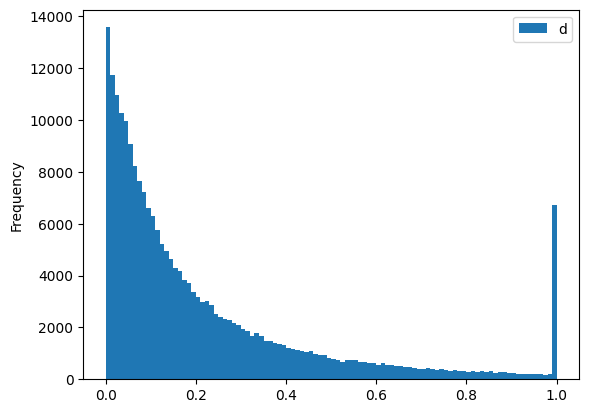

In [46]:
pd.DataFrame(np.abs(c).reshape(-1, 1), columns=["d"]).plot(kind="hist", bins=100)

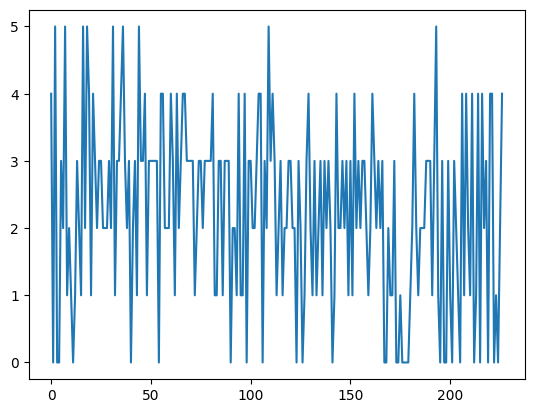

In [28]:
plt.plot([c[0] for c in clusterings])

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 3649.91it/s]


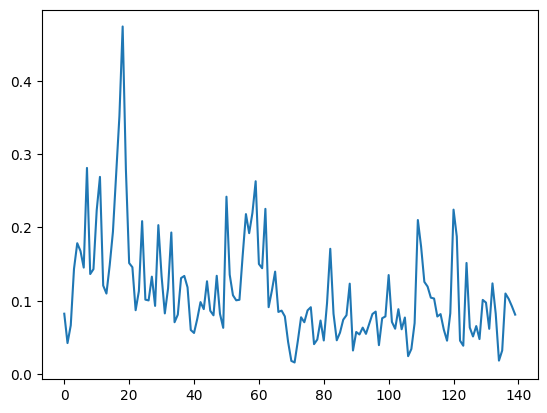

In [14]:
from sklearn.metrics import adjusted_rand_score
from itertools import repeat

clusterings = []
for clustering in tqdm(s):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        



plt.plot([adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])])


100%|██████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 6973.25it/s]


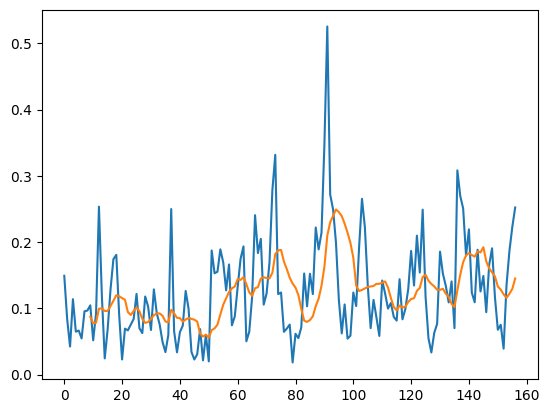

In [33]:
from sklearn.metrics import adjusted_rand_score
from itertools import repeat
import matplotlib.pyplot as plt

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        

p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3839.79it/s]


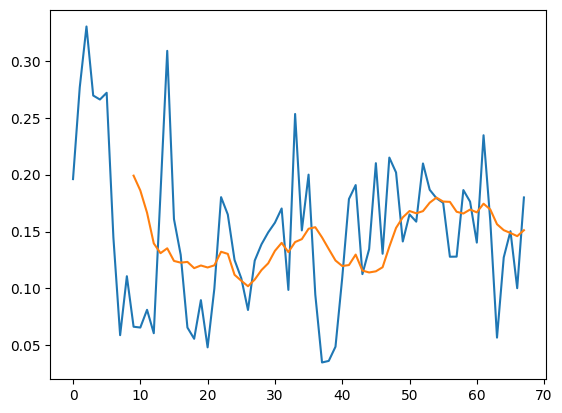

In [19]:
from itertools import repeat
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        


p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

100%|██████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 8416.01it/s]


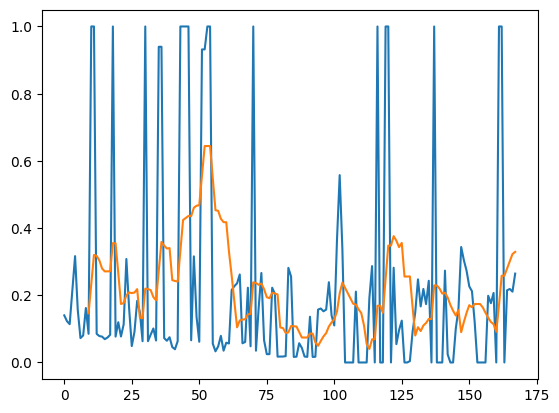

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        


p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

In [22]:
np.mean(p)

0.22273500199019827

In [34]:
np.mean(p)

0.12615887287868527